In [260]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


# RUN BLR

In [261]:
! rm -r '/Users/ltran/Documents/TrueData0104/CPC_ML_tutorial/models/test/'
! mkdir '/Users/ltran/Documents/TrueData0104/CPC_ML_tutorial/models/test/'

In [262]:
import os
os.chdir('/Users/ltran/Documents/TrueData29/CPC_ML_tutorial/')

import numpy as np
import pandas as pd
import pickle
from matplotlib import pyplot as plt
import seaborn as sns
import random

from scipy.stats import fisher_exact
from pcntoolkit.normative import estimate, predict, evaluate
from pcntoolkit.util.utils import compute_MSLL, create_design_matrix
from nm_utils import calibration_descriptives, remove_bad_subjects, load_2d
from sklearn.model_selection import train_test_split
# Set data directory
data_dir = '/Users/ltran/Documents/Data/'

# Set working directory
root_dir = '/Users/ltran/Documents/TrueData0104/CPC_ML_tutorial/'
out_dir = os.path.join(root_dir,'models','test')

# create the output directory if it does not already exist
os.makedirs(out_dir, exist_ok=True)

## Load DF_ALL

In [307]:
df_aims = pd.read_csv(os.path.join(data_dir, 'Outputs/df_aims.csv'))

In [263]:
df_aims = pd.read_csv(os.path.join(data_dir, 'Outputs/abide.csv'))

### Define ROI

### Surface

In [221]:
all_cols = [col for col in df_aims.columns if '_area' in col]

In [71]:
len(all_cols)

0

In [72]:
idp_ids = all_cols

### Thickness

In [282]:
all_cols = [col for col in df_aims.columns if '_thickness' in col]


In [283]:
len(all_cols)

68

In [284]:
idp_ids = ['lh_bankssts_thickness',
               'lh_caudalanteriorcingulate_thickness',
               'lh_caudalmiddlefrontal_thickness',
               'lh_cuneus_thickness',
               'lh_entorhinal_thickness',
               'lh_fusiform_thickness',
               'lh_inferiorparietal_thickness',
               'lh_inferiortemporal_thickness',
               'lh_isthmuscingulate_thickness',
               'lh_lateraloccipital_thickness',
               'lh_lateralorbitofrontal_thickness',
               'lh_lingual_thickness',
               'lh_medialorbitofrontal_thickness',
               'lh_middletemporal_thickness',
               'lh_parahippocampal_thickness',
               'lh_paracentral_thickness',
               'lh_parsopercularis_thickness',
               'lh_parsorbitalis_thickness',
               'lh_parstriangularis_thickness',
               'lh_pericalcarine_thickness',
               'lh_postcentral_thickness',
               'lh_posteriorcingulate_thickness',
               'lh_precentral_thickness',
               'lh_precuneus_thickness',
               'lh_rostralanteriorcingulate_thickness',
               'lh_rostralmiddlefrontal_thickness',
               'lh_superiorfrontal_thickness',
               'lh_superiorparietal_thickness',
               'lh_superiortemporal_thickness',
               'lh_supramarginal_thickness',
               'lh_frontalpole_thickness',
               'lh_temporalpole_thickness',
               'lh_transversetemporal_thickness',
               'lh_insula_thickness',
               'rh_bankssts_thickness',
               'rh_caudalanteriorcingulate_thickness',
               'rh_caudalmiddlefrontal_thickness',
               'rh_cuneus_thickness',
               'rh_entorhinal_thickness',
               'rh_fusiform_thickness',
               'rh_inferiorparietal_thickness',
               'rh_inferiortemporal_thickness',
               'rh_isthmuscingulate_thickness',
               'rh_lateraloccipital_thickness',
               'rh_lateralorbitofrontal_thickness',
               'rh_lingual_thickness',
               'rh_medialorbitofrontal_thickness',
               'rh_middletemporal_thickness',
               'rh_parahippocampal_thickness',
               'rh_paracentral_thickness',
               'rh_parsopercularis_thickness',
               'rh_parsorbitalis_thickness',
               'rh_parstriangularis_thickness',
               'rh_pericalcarine_thickness',
               'rh_postcentral_thickness',
               'rh_posteriorcingulate_thickness',
               'rh_precentral_thickness',
               'rh_precuneus_thickness',
               'rh_rostralanteriorcingulate_thickness',
               'rh_rostralmiddlefrontal_thickness',
               'rh_superiorfrontal_thickness',
               'rh_superiorparietal_thickness',
               'rh_superiortemporal_thickness',
               'rh_supramarginal_thickness',
               'rh_frontalpole_thickness',
               'rh_temporalpole_thickness',
               'rh_transversetemporal_thickness',
               'rh_insula_thickness']

In [285]:
all_cols = idp_ids

In [286]:
df_aims['mean_ct'] = df_aims[all_cols].mean(axis = 1)

In [287]:
df_aims = df_aims[~((df_aims.site == 'EMC_1') |(df_aims.site =='SBL')| (df_aims.site =='UM_2'))]

In [288]:
df_td = df_aims[df_aims.ASD == 'No']

In [289]:
df_asd = df_aims[df_aims.ASD == 'Yes']

### Volumes

In [21]:
idp_ids = ['Left_Lateral_Ventricle',
 'Left_Inf_Lat_Vent',
 'Left_Cerebellum_White_Matter',
 'Left_Cerebellum_Cortex',
 'Left_Thalamus',
 'Left_Caudate',
 'Left_Putamen',
 'Left_Pallidum',
 'Brain_Stem',
 'Left_Hippocampus',
 'Left_Amygdala',
 'CSF',
 'Left_Accumbens_area',
 'Left_VentralDC',
 'Left_vessel',
 'Left_choroid_plexus',
 'Right_Lateral_Ventricle',
 'Right_Inf_Lat_Vent',
 'Right_Cerebellum_White_Matter',
 'Right_Cerebellum_Cortex',
 'Right_Thalamus',
 'Right_Caudate',
 'Right_Putamen',
 'Right_Pallidum',
 'Right_Hippocampus',
 'Right_Amygdala',
 'Right_Accumbens_area',
 'Right_VentralDC',
 'Right_vessel',
 'Right_choroid_plexus']

# Run BLR

In [290]:
pred_bool = input("Prediction on TD + ASD : 1 \nPrediction on ASD only : 2\n")

Prediction on TD + ASD : 1 
Prediction on ASD only : 2
1


In [291]:
# Metric DataFrame
metric_analysis = pd.DataFrame(columns = ['ROIs', 'EV mean', 'EV max', 'MSLL mean', 'MSLL min', 'Covs', 'Fixed effect', 'xmin', 'xmax', 'Outlier Thresh'])



In [292]:
# Choosing covariates
cols_cov = ['age_at_scan','sex', 'mean_ct']

# EstimatedTotalIntraCranialVol 
# mean_ct


fixed_effect = 'NA'

# Type of Warping 
warp =  'WarpSinArcsinh'


# B-Spline limits
xmin = round(df_td['age_at_scan'].min() - 5) # ~ age min - 5 
xmax = round(df_td['age_at_scan'].max() + 5) # ~ age max + 5

force_refit = True 

# Threshold for outliers
outlier_thresh = 5

In [293]:
# DataFrame with only TD

strat = ['age_at_scan', 'sex', 'site']
if (pred_bool == '1'):
    
    

    #Split train & test, stratified by site
    df_sx, df_tex1, df_sy, df_tey1 = train_test_split(df_td[strat], df_td[idp_ids], 
                                                        test_size=0.33, 
                                                        random_state=42,
                                                       stratify = df_td[['site']])

    df_trx, df_tex2, df_try, df_tey2 = train_test_split(df_sx, df_sy, 
                                                       test_size = 0.5, random_state=42, 
                                                      stratify = df_sx[['site']])

    df_te1 = df_tex1.join(df_tey1).join(df_td['mean_ct'])
    df_te2 = df_tex2.join(df_tey2).join(df_td[['ASD', 'mean_ct']])

    df_tr = df_trx.join(df_try).join(df_td['mean_ct'])
elif (pred_bool == '2'):
    
    df_sx, df_tex1, df_sy, df_tey1 = train_test_split(df_td[strat], df_td[idp_ids], 
                                                    test_size=0.5, 
                                                    random_state=42,
                                                   stratify = df_td['site'])
    df_tr = df_sx.join(df_sy)
    df_te1 = df_tex1.join(df_tey1)

In [294]:
site_ids = set(df_tr['site'])
site_ids_tr = set(df_tr['site'])
site_ids_te = set(df_te1['site'])


for idp_num, idp in enumerate(idp_ids): 
    print('Running IDP', idp_num, idp, ':')

    # set output dir 
    idp_dir = os.path.join(out_dir, idp)
    os.makedirs(os.path.join(idp_dir), exist_ok=True)
    os.chdir(idp_dir)

    # extract the response variables for training and test set
    y_tr = df_tr[idp].to_numpy() 
    y_te = df_te1[idp].to_numpy()

    # remove gross outliers and implausible values
    yz_tr = (y_tr - np.mean(y_tr)) / np.std(y_tr)
    yz_te = (y_te - np.mean(y_te)) / np.std(y_te)
    nz_tr = np.bitwise_and(np.abs(yz_tr) < outlier_thresh, y_tr > 0)
    nz_te = np.bitwise_and(np.abs(yz_te) < outlier_thresh, y_te > 0)
    y_tr = y_tr[nz_tr]
    y_te = y_te[nz_te]

    # write out the response variables for training and test
    resp_file_tr = os.path.join(idp_dir, 'resp_tr.txt')
    resp_file_te = os.path.join(idp_dir, 'resp_te.txt') 
    np.savetxt(resp_file_tr, y_tr)
    np.savetxt(resp_file_te, y_te)

    # configure the design matrix
    X_tr = create_design_matrix(df_tr[cols_cov].loc[nz_tr], 
                                site_ids = df_tr['site'].loc[nz_tr],
                                basis = 'bspline', 
                                xmin = xmin, 
                                xmax = xmax)
    X_te = create_design_matrix(df_te1[cols_cov].loc[nz_te], 
                                site_ids = df_te1['site'].loc[nz_te], 
                                all_sites=site_ids,
                                basis = 'bspline', 
                                xmin = xmin, 
                                xmax = xmax)

    # configure and save the covariates
    cov_file_tr = os.path.join(idp_dir, 'cov_bspline_tr.txt')
    cov_file_te = os.path.join(idp_dir, 'cov_bspline_te.txt')
    np.savetxt(cov_file_tr, X_tr)
    np.savetxt(cov_file_te, X_te)

    if not force_refit and os.path.exists(os.path.join(idp_dir, 'Models', 'NM_0_0_estimate.pkl')):
        print('Making predictions using a pre-existing model...')
        suffix = 'predict'

        # Make prdictsion with test data
        predict(cov_file_te, 
                alg='blr', 
                respfile=resp_file_te, 
                model_path=os.path.join(idp_dir,'Models'),
                outputsuffix=suffix)
    else:
        print('Estimating the normative model...')
        estimate(cov_file_tr, resp_file_tr, testresp=resp_file_te, 
                 testcov=cov_file_te, alg='blr', optimizer = 'l-bfgs-b', 
                 savemodel=True, warp=warp, warp_reparam=True)
        suffix = 'estimate'
blr_metrics = pd.DataFrame(columns = ['eid', 'NLL', 'EV', 'MSLL', 'BIC','Skew','Kurtosis'])

for idp_num, idp in enumerate(idp_ids): 
    idp_dir = os.path.join(out_dir, idp)

    # load the predictions and true data. We use a custom function that ensures 2d arrays
    # equivalent to: y = np.loadtxt(filename); y = y[:, np.newaxis]
    yhat_te = load_2d(os.path.join(idp_dir, 'yhat_' + suffix + '.txt'))
    s2_te = load_2d(os.path.join(idp_dir, 'ys2_' + suffix + '.txt'))
    y_te = load_2d(os.path.join(idp_dir, 'resp_te.txt'))

    with open(os.path.join(idp_dir,'Models', 'NM_0_0_estimate.pkl'), 'rb') as handle:
        nm = pickle.load(handle) 

    # compute error metrics
    if warp is None:
        metrics = evaluate(y_te, yhat_te)  

        # compute MSLL manually as a sanity check
        y_tr_mean = np.array( [[np.mean(y_tr)]] )
        y_tr_var = np.array( [[np.var(y_tr)]] )
        MSLL = compute_MSLL(y_te, yhat_te, s2_te, y_tr_mean, y_tr_var)         
    else:
        warp_param = nm.blr.hyp[1:nm.blr.warp.get_n_params()+1] 
        W = nm.blr.warp

        # warp predictions
        med_te = W.warp_predictions(np.squeeze(yhat_te), np.squeeze(s2_te), warp_param)[0]
        med_te = med_te[:, np.newaxis]

        # evaluation metrics
        metrics = evaluate(y_te, med_te)

        # compute MSLL manually
        y_te_w = W.f(y_te, warp_param)
        y_tr_w = W.f(y_tr, warp_param)
        y_tr_mean = np.array( [[np.mean(y_tr_w)]] )
        y_tr_var = np.array( [[np.var(y_tr_w)]] )
        MSLL = compute_MSLL(y_te_w, yhat_te, s2_te, y_tr_mean, y_tr_var)     

    Z = np.loadtxt(os.path.join(idp_dir, 'Z_' + suffix + '.txt'))
    [skew, sdskew, kurtosis, sdkurtfddfosis, semean, sesd] = calibration_descriptives(Z)

    BIC = len(nm.blr.hyp) * np.log(y_tr.shape[0]) + 2 * nm.neg_log_lik

    blr_metrics.loc[len(blr_metrics)] = [idp, nm.neg_log_lik, metrics['EXPV'][0], 
                                         MSLL[0], BIC, skew, kurtosis]

display(blr_metrics)

blr_metrics.to_csv(os.path.join(out_dir,'blr_metrics.csv'))
new_row = {'ROIs' : len(idp_ids) , 'EV mean': blr_metrics['EV'].mean(), 'EV max' : blr_metrics['EV'].max() , 'MSLL mean': blr_metrics['MSLL'].mean(), 'MSLL min' : blr_metrics['MSLL'].min(), 'Covs' : cols_cov, 'Fixed effect' : fixed_effect , 'xmin' : xmin, 'xmax' : xmax, 'Outlier Thresh' : outlier_thresh}
metric_analysis = metric_analysis.append(new_row, ignore_index=True)

Running IDP 0 lh_bankssts_thickness :
Estimating the normative model...
Processing data in /Users/ltran/Documents/TrueData0104/CPC_ML_tutorial/models/test/lh_bankssts_thickness/resp_tr.txt
Estimating model  1 of 1
configuring BLR ( order 1 )
Using default hyperparameters
Saving model meta-data...
Evaluating the model ...
Writing outputs ...
Running IDP 1 lh_caudalanteriorcingulate_thickness :
Estimating the normative model...
Processing data in /Users/ltran/Documents/TrueData0104/CPC_ML_tutorial/models/test/lh_caudalanteriorcingulate_thickness/resp_tr.txt
Estimating model  1 of 1
configuring BLR ( order 1 )
Using default hyperparameters
Saving model meta-data...
Evaluating the model ...
Writing outputs ...
Running IDP 2 lh_caudalmiddlefrontal_thickness :
Estimating the normative model...
Processing data in /Users/ltran/Documents/TrueData0104/CPC_ML_tutorial/models/test/lh_caudalmiddlefrontal_thickness/resp_tr.txt
Estimating model  1 of 1
configuring BLR ( order 1 )
Using default hyperp

/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/model/bayesreg.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=2.45436e-21): result may not be accurate.
  invAXt = linalg.solve(self.A, X.T, check_finite=False)
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/model/bayesreg.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=7.35117e-22): result may not be accurate.
  invAXt = linalg.solve(self.A, X.T, check_finite=False)
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/model/bayesreg.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=3.93001e-21): result may not be accurate.
  invAXt = linalg.solve(self.A, X.T, check_finite=False)
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/model/bayesreg.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=7.01952e-21): result may not be accurate.
  invAXt = linalg.solve(self.A, X.T, check_finite=False)
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/mo

Saving model meta-data...
Evaluating the model ...
Writing outputs ...
Running IDP 3 lh_cuneus_thickness :
Estimating the normative model...
Processing data in /Users/ltran/Documents/TrueData0104/CPC_ML_tutorial/models/test/lh_cuneus_thickness/resp_tr.txt
Estimating model  1 of 1
configuring BLR ( order 1 )
Using default hyperparameters
Saving model meta-data...
Evaluating the model ...
Writing outputs ...
Running IDP 4 lh_entorhinal_thickness :


/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/model/bayesreg.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=6.50216e-23): result may not be accurate.
  invAXt = linalg.solve(self.A, X.T, check_finite=False)
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/model/bayesreg.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=4.28906e-21): result may not be accurate.
  invAXt = linalg.solve(self.A, X.T, check_finite=False)
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/model/bayesreg.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=5.63641e-21): result may not be accurate.
  invAXt = linalg.solve(self.A, X.T, check_finite=False)
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/model/bayesreg.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.23091e-21): result may not be accurate.
  invAXt = linalg.solve(self.A, X.T, check_finite=False)
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/mo

Estimating the normative model...
Processing data in /Users/ltran/Documents/TrueData0104/CPC_ML_tutorial/models/test/lh_entorhinal_thickness/resp_tr.txt
Estimating model  1 of 1
configuring BLR ( order 1 )
Using default hyperparameters
Saving model meta-data...
Evaluating the model ...
Writing outputs ...
Running IDP 5 lh_fusiform_thickness :
Estimating the normative model...
Processing data in /Users/ltran/Documents/TrueData0104/CPC_ML_tutorial/models/test/lh_fusiform_thickness/resp_tr.txt
Estimating model  1 of 1
configuring BLR ( order 1 )
Using default hyperparameters
Saving model meta-data...
Evaluating the model ...
Writing outputs ...
Running IDP 6 lh_inferiorparietal_thickness :
Estimating the normative model...
Processing data in /Users/ltran/Documents/TrueData0104/CPC_ML_tutorial/models/test/lh_inferiorparietal_thickness/resp_tr.txt
Estimating model  1 of 1
configuring BLR ( order 1 )
Using default hyperparameters
Saving model meta-data...
Evaluating the model ...
Writing out

/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/model/bayesreg.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=2.60509e-21): result may not be accurate.
  invAXt = linalg.solve(self.A, X.T, check_finite=False)
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/model/bayesreg.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.15416e-21): result may not be accurate.
  invAXt = linalg.solve(self.A, X.T, check_finite=False)
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/model/bayesreg.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=4.97886e-21): result may not be accurate.
  invAXt = linalg.solve(self.A, X.T, check_finite=False)


Saving model meta-data...
Evaluating the model ...
Writing outputs ...
Running IDP 14 lh_parahippocampal_thickness :
Estimating the normative model...
Processing data in /Users/ltran/Documents/TrueData0104/CPC_ML_tutorial/models/test/lh_parahippocampal_thickness/resp_tr.txt
Estimating model  1 of 1
configuring BLR ( order 1 )
Using default hyperparameters
Saving model meta-data...
Evaluating the model ...
Writing outputs ...
Running IDP 15 lh_paracentral_thickness :
Estimating the normative model...
Processing data in /Users/ltran/Documents/TrueData0104/CPC_ML_tutorial/models/test/lh_paracentral_thickness/resp_tr.txt
Estimating model  1 of 1
configuring BLR ( order 1 )
Using default hyperparameters


/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/model/bayesreg.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.24915e-21): result may not be accurate.
  invAXt = linalg.solve(self.A, X.T, check_finite=False)
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/model/bayesreg.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=3.22934e-21): result may not be accurate.
  invAXt = linalg.solve(self.A, X.T, check_finite=False)
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/model/bayesreg.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=4.29023e-21): result may not be accurate.
  invAXt = linalg.solve(self.A, X.T, check_finite=False)
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/model/bayesreg.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=3.7255e-21): result may not be accurate.
  invAXt = linalg.solve(self.A, X.T, check_finite=False)
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/mod

Saving model meta-data...
Evaluating the model ...
Writing outputs ...
Running IDP 16 lh_parsopercularis_thickness :
Estimating the normative model...
Processing data in /Users/ltran/Documents/TrueData0104/CPC_ML_tutorial/models/test/lh_parsopercularis_thickness/resp_tr.txt
Estimating model  1 of 1
configuring BLR ( order 1 )
Using default hyperparameters
Saving model meta-data...
Evaluating the model ...
Writing outputs ...
Running IDP 17 lh_parsorbitalis_thickness :
Estimating the normative model...
Processing data in /Users/ltran/Documents/TrueData0104/CPC_ML_tutorial/models/test/lh_parsorbitalis_thickness/resp_tr.txt
Estimating model  1 of 1
configuring BLR ( order 1 )
Using default hyperparameters
Saving model meta-data...
Evaluating the model ...
Writing outputs ...
Running IDP 18 lh_parstriangularis_thickness :
Estimating the normative model...
Processing data in /Users/ltran/Documents/TrueData0104/CPC_ML_tutorial/models/test/lh_parstriangularis_thickness/resp_tr.txt
Estimating 

/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/model/bayesreg.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=4.18573e-21): result may not be accurate.
  invAXt = linalg.solve(self.A, X.T, check_finite=False)
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/model/bayesreg.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=3.03794e-21): result may not be accurate.
  invAXt = linalg.solve(self.A, X.T, check_finite=False)
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/model/bayesreg.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=3.0009e-22): result may not be accurate.
  invAXt = linalg.solve(self.A, X.T, check_finite=False)


Saving model meta-data...
Evaluating the model ...
Writing outputs ...
Running IDP 19 lh_pericalcarine_thickness :
Estimating the normative model...
Processing data in /Users/ltran/Documents/TrueData0104/CPC_ML_tutorial/models/test/lh_pericalcarine_thickness/resp_tr.txt
Estimating model  1 of 1
configuring BLR ( order 1 )
Using default hyperparameters
Saving model meta-data...
Evaluating the model ...
Writing outputs ...
Running IDP 20 lh_postcentral_thickness :
Estimating the normative model...
Processing data in /Users/ltran/Documents/TrueData0104/CPC_ML_tutorial/models/test/lh_postcentral_thickness/resp_tr.txt
Estimating model  1 of 1
configuring BLR ( order 1 )
Using default hyperparameters
Saving model meta-data...
Evaluating the model ...
Writing outputs ...
Running IDP 21 lh_posteriorcingulate_thickness :
Estimating the normative model...
Processing data in /Users/ltran/Documents/TrueData0104/CPC_ML_tutorial/models/test/lh_posteriorcingulate_thickness/resp_tr.txt
Estimating mode

/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/model/bayesreg.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=8.83994e-22): result may not be accurate.
  invAXt = linalg.solve(self.A, X.T, check_finite=False)
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/model/bayesreg.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.96339e-21): result may not be accurate.
  invAXt = linalg.solve(self.A, X.T, check_finite=False)
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/model/bayesreg.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.81044e-21): result may not be accurate.
  invAXt = linalg.solve(self.A, X.T, check_finite=False)
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/model/bayesreg.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=3.13521e-21): result may not be accurate.
  invAXt = linalg.solve(self.A, X.T, check_finite=False)
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/mo

Saving model meta-data...
Evaluating the model ...
Writing outputs ...
Running IDP 22 lh_precentral_thickness :
Estimating the normative model...
Processing data in /Users/ltran/Documents/TrueData0104/CPC_ML_tutorial/models/test/lh_precentral_thickness/resp_tr.txt
Estimating model  1 of 1
configuring BLR ( order 1 )
Using default hyperparameters
Saving model meta-data...
Evaluating the model ...
Writing outputs ...
Running IDP 23 lh_precuneus_thickness :
Estimating the normative model...
Processing data in /Users/ltran/Documents/TrueData0104/CPC_ML_tutorial/models/test/lh_precuneus_thickness/resp_tr.txt
Estimating model  1 of 1
configuring BLR ( order 1 )
Using default hyperparameters
Saving model meta-data...
Evaluating the model ...
Writing outputs ...
Running IDP 24 lh_rostralanteriorcingulate_thickness :
Estimating the normative model...
Processing data in /Users/ltran/Documents/TrueData0104/CPC_ML_tutorial/models/test/lh_rostralanteriorcingulate_thickness/resp_tr.txt
Estimating mo

/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/model/bayesreg.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=5.61108e-22): result may not be accurate.
  invAXt = linalg.solve(self.A, X.T, check_finite=False)
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/model/bayesreg.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=3.49641e-21): result may not be accurate.
  invAXt = linalg.solve(self.A, X.T, check_finite=False)
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/model/bayesreg.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=2.35253e-21): result may not be accurate.
  invAXt = linalg.solve(self.A, X.T, check_finite=False)
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/model/bayesreg.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=6.98053e-21): result may not be accurate.
  invAXt = linalg.solve(self.A, X.T, check_finite=False)
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/mo

Saving model meta-data...
Evaluating the model ...
Writing outputs ...
Running IDP 25 lh_rostralmiddlefrontal_thickness :
Estimating the normative model...
Processing data in /Users/ltran/Documents/TrueData0104/CPC_ML_tutorial/models/test/lh_rostralmiddlefrontal_thickness/resp_tr.txt
Estimating model  1 of 1
configuring BLR ( order 1 )
Using default hyperparameters


/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/model/bayesreg.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=7.75627e-21): result may not be accurate.
  invAXt = linalg.solve(self.A, X.T, check_finite=False)
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/model/bayesreg.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=7.58004e-22): result may not be accurate.
  invAXt = linalg.solve(self.A, X.T, check_finite=False)
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/model/bayesreg.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.20192e-22): result may not be accurate.
  invAXt = linalg.solve(self.A, X.T, check_finite=False)
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/model/bayesreg.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=3.16121e-21): result may not be accurate.
  invAXt = linalg.solve(self.A, X.T, check_finite=False)
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/mo

Saving model meta-data...
Evaluating the model ...
Writing outputs ...
Running IDP 26 lh_superiorfrontal_thickness :
Estimating the normative model...
Processing data in /Users/ltran/Documents/TrueData0104/CPC_ML_tutorial/models/test/lh_superiorfrontal_thickness/resp_tr.txt
Estimating model  1 of 1
configuring BLR ( order 1 )
Using default hyperparameters
Saving model meta-data...
Evaluating the model ...
Writing outputs ...
Running IDP 27 lh_superiorparietal_thickness :
Estimating the normative model...
Processing data in /Users/ltran/Documents/TrueData0104/CPC_ML_tutorial/models/test/lh_superiorparietal_thickness/resp_tr.txt
Estimating model  1 of 1
configuring BLR ( order 1 )
Using default hyperparameters
Saving model meta-data...
Evaluating the model ...
Writing outputs ...
Running IDP 28 lh_superiortemporal_thickness :
Estimating the normative model...
Processing data in /Users/ltran/Documents/TrueData0104/CPC_ML_tutorial/models/test/lh_superiortemporal_thickness/resp_tr.txt
Estim

/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/model/bayesreg.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=3.10086e-21): result may not be accurate.
  invAXt = linalg.solve(self.A, X.T, check_finite=False)
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/model/bayesreg.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.79876e-21): result may not be accurate.
  invAXt = linalg.solve(self.A, X.T, check_finite=False)
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/model/bayesreg.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=8.35889e-22): result may not be accurate.
  invAXt = linalg.solve(self.A, X.T, check_finite=False)
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/model/bayesreg.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=6.17428e-22): result may not be accurate.
  invAXt = linalg.solve(self.A, X.T, check_finite=False)
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/mo

Estimating model  1 of 1
configuring BLR ( order 1 )
Using default hyperparameters
Saving model meta-data...
Evaluating the model ...
Writing outputs ...
Running IDP 31 lh_temporalpole_thickness :
Estimating the normative model...
Processing data in /Users/ltran/Documents/TrueData0104/CPC_ML_tutorial/models/test/lh_temporalpole_thickness/resp_tr.txt
Estimating model  1 of 1
configuring BLR ( order 1 )
Using default hyperparameters


/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/model/bayesreg.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.00309e-21): result may not be accurate.
  invAXt = linalg.solve(self.A, X.T, check_finite=False)
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/model/bayesreg.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=2.82058e-22): result may not be accurate.
  invAXt = linalg.solve(self.A, X.T, check_finite=False)
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/model/bayesreg.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.7067e-21): result may not be accurate.
  invAXt = linalg.solve(self.A, X.T, check_finite=False)
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/model/bayesreg.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=3.31431e-22): result may not be accurate.
  invAXt = linalg.solve(self.A, X.T, check_finite=False)
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/mod

Saving model meta-data...
Evaluating the model ...
Writing outputs ...
Running IDP 32 lh_transversetemporal_thickness :
Estimating the normative model...
Processing data in /Users/ltran/Documents/TrueData0104/CPC_ML_tutorial/models/test/lh_transversetemporal_thickness/resp_tr.txt
Estimating model  1 of 1
configuring BLR ( order 1 )
Using default hyperparameters
Saving model meta-data...
Evaluating the model ...
Writing outputs ...
Running IDP 33 lh_insula_thickness :
Estimating the normative model...
Processing data in /Users/ltran/Documents/TrueData0104/CPC_ML_tutorial/models/test/lh_insula_thickness/resp_tr.txt
Estimating model  1 of 1
configuring BLR ( order 1 )
Using default hyperparameters
Saving model meta-data...
Evaluating the model ...
Writing outputs ...
Running IDP 34 rh_bankssts_thickness :
Estimating the normative model...
Processing data in /Users/ltran/Documents/TrueData0104/CPC_ML_tutorial/models/test/rh_bankssts_thickness/resp_tr.txt
Estimating model  1 of 1
configurin

/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/model/bayesreg.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=4.2299e-21): result may not be accurate.
  invAXt = linalg.solve(self.A, X.T, check_finite=False)
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/model/bayesreg.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.4314e-21): result may not be accurate.
  invAXt = linalg.solve(self.A, X.T, check_finite=False)
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/model/bayesreg.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=4.70736e-21): result may not be accurate.
  invAXt = linalg.solve(self.A, X.T, check_finite=False)
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/model/bayesreg.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.1892e-21): result may not be accurate.
  invAXt = linalg.solve(self.A, X.T, check_finite=False)
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/model

Saving model meta-data...
Evaluating the model ...
Writing outputs ...
Running IDP 37 rh_cuneus_thickness :
Estimating the normative model...
Processing data in /Users/ltran/Documents/TrueData0104/CPC_ML_tutorial/models/test/rh_cuneus_thickness/resp_tr.txt
Estimating model  1 of 1
configuring BLR ( order 1 )
Using default hyperparameters
Saving model meta-data...
Evaluating the model ...
Writing outputs ...
Running IDP 38 rh_entorhinal_thickness :


/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/model/bayesreg.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=3.54018e-21): result may not be accurate.
  invAXt = linalg.solve(self.A, X.T, check_finite=False)
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/model/bayesreg.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=5.01907e-22): result may not be accurate.
  invAXt = linalg.solve(self.A, X.T, check_finite=False)
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/model/bayesreg.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=4.34802e-21): result may not be accurate.
  invAXt = linalg.solve(self.A, X.T, check_finite=False)
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/model/bayesreg.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=3.27532e-21): result may not be accurate.
  invAXt = linalg.solve(self.A, X.T, check_finite=False)
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/mo

Estimating the normative model...
Processing data in /Users/ltran/Documents/TrueData0104/CPC_ML_tutorial/models/test/rh_entorhinal_thickness/resp_tr.txt
Estimating model  1 of 1
configuring BLR ( order 1 )
Using default hyperparameters
Saving model meta-data...
Evaluating the model ...
Writing outputs ...
Running IDP 39 rh_fusiform_thickness :
Estimating the normative model...
Processing data in /Users/ltran/Documents/TrueData0104/CPC_ML_tutorial/models/test/rh_fusiform_thickness/resp_tr.txt
Estimating model  1 of 1
configuring BLR ( order 1 )
Using default hyperparameters


/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/model/bayesreg.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=7.77702e-21): result may not be accurate.
  invAXt = linalg.solve(self.A, X.T, check_finite=False)
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/model/bayesreg.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=3.7718e-21): result may not be accurate.
  invAXt = linalg.solve(self.A, X.T, check_finite=False)
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/model/bayesreg.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=5.988e-22): result may not be accurate.
  invAXt = linalg.solve(self.A, X.T, check_finite=False)
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/model/bayesreg.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=3.01542e-21): result may not be accurate.
  invAXt = linalg.solve(self.A, X.T, check_finite=False)
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/model

Saving model meta-data...
Evaluating the model ...
Writing outputs ...
Running IDP 40 rh_inferiorparietal_thickness :
Estimating the normative model...
Processing data in /Users/ltran/Documents/TrueData0104/CPC_ML_tutorial/models/test/rh_inferiorparietal_thickness/resp_tr.txt
Estimating model  1 of 1
configuring BLR ( order 1 )
Using default hyperparameters
Saving model meta-data...
Evaluating the model ...
Writing outputs ...
Running IDP 41 rh_inferiortemporal_thickness :
Estimating the normative model...
Processing data in /Users/ltran/Documents/TrueData0104/CPC_ML_tutorial/models/test/rh_inferiortemporal_thickness/resp_tr.txt
Estimating model  1 of 1
configuring BLR ( order 1 )
Using default hyperparameters
Saving model meta-data...
Evaluating the model ...
Writing outputs ...
Running IDP 42 rh_isthmuscingulate_thickness :
Estimating the normative model...
Processing data in /Users/ltran/Documents/TrueData0104/CPC_ML_tutorial/models/test/rh_isthmuscingulate_thickness/resp_tr.txt
Est

/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/model/bayesreg.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.18797e-21): result may not be accurate.
  invAXt = linalg.solve(self.A, X.T, check_finite=False)
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/model/bayesreg.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=4.22059e-22): result may not be accurate.
  invAXt = linalg.solve(self.A, X.T, check_finite=False)
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/model/bayesreg.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.42309e-21): result may not be accurate.
  invAXt = linalg.solve(self.A, X.T, check_finite=False)
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/model/bayesreg.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=7.62964e-21): result may not be accurate.
  invAXt = linalg.solve(self.A, X.T, check_finite=False)
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/mo

Saving model meta-data...
Evaluating the model ...
Writing outputs ...
Running IDP 46 rh_medialorbitofrontal_thickness :
Estimating the normative model...
Processing data in /Users/ltran/Documents/TrueData0104/CPC_ML_tutorial/models/test/rh_medialorbitofrontal_thickness/resp_tr.txt
Estimating model  1 of 1
configuring BLR ( order 1 )
Using default hyperparameters
Saving model meta-data...
Evaluating the model ...
Writing outputs ...
Running IDP 47 rh_middletemporal_thickness :
Estimating the normative model...
Processing data in /Users/ltran/Documents/TrueData0104/CPC_ML_tutorial/models/test/rh_middletemporal_thickness/resp_tr.txt
Estimating model  1 of 1
configuring BLR ( order 1 )
Using default hyperparameters
Saving model meta-data...
Evaluating the model ...
Writing outputs ...
Running IDP 48 rh_parahippocampal_thickness :
Estimating the normative model...
Processing data in /Users/ltran/Documents/TrueData0104/CPC_ML_tutorial/models/test/rh_parahippocampal_thickness/resp_tr.txt
Est

/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/model/bayesreg.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.80252e-21): result may not be accurate.
  invAXt = linalg.solve(self.A, X.T, check_finite=False)
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/model/bayesreg.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=2.19975e-21): result may not be accurate.
  invAXt = linalg.solve(self.A, X.T, check_finite=False)
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/model/bayesreg.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=9.87147e-21): result may not be accurate.
  invAXt = linalg.solve(self.A, X.T, check_finite=False)
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/model/bayesreg.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=3.35351e-21): result may not be accurate.
  invAXt = linalg.solve(self.A, X.T, check_finite=False)
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/mo

Saving model meta-data...
Evaluating the model ...
Writing outputs ...
Running IDP 49 rh_paracentral_thickness :
Estimating the normative model...
Processing data in /Users/ltran/Documents/TrueData0104/CPC_ML_tutorial/models/test/rh_paracentral_thickness/resp_tr.txt
Estimating model  1 of 1
configuring BLR ( order 1 )
Using default hyperparameters
Saving model meta-data...
Evaluating the model ...
Writing outputs ...
Running IDP 50 rh_parsopercularis_thickness :
Estimating the normative model...
Processing data in /Users/ltran/Documents/TrueData0104/CPC_ML_tutorial/models/test/rh_parsopercularis_thickness/resp_tr.txt
Estimating model  1 of 1
configuring BLR ( order 1 )
Using default hyperparameters
Saving model meta-data...
Evaluating the model ...
Writing outputs ...
Running IDP 51 rh_parsorbitalis_thickness :
Estimating the normative model...
Processing data in /Users/ltran/Documents/TrueData0104/CPC_ML_tutorial/models/test/rh_parsorbitalis_thickness/resp_tr.txt
Estimating model  1 o

/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/model/bayesreg.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=5.82731e-21): result may not be accurate.
  invAXt = linalg.solve(self.A, X.T, check_finite=False)
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/model/bayesreg.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=8.60916e-21): result may not be accurate.
  invAXt = linalg.solve(self.A, X.T, check_finite=False)
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/model/bayesreg.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.88523e-21): result may not be accurate.
  invAXt = linalg.solve(self.A, X.T, check_finite=False)
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/model/bayesreg.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=9.75637e-21): result may not be accurate.
  invAXt = linalg.solve(self.A, X.T, check_finite=False)
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/mo

Saving model meta-data...
Evaluating the model ...
Writing outputs ...
Running IDP 55 rh_posteriorcingulate_thickness :
Estimating the normative model...
Processing data in /Users/ltran/Documents/TrueData0104/CPC_ML_tutorial/models/test/rh_posteriorcingulate_thickness/resp_tr.txt
Estimating model  1 of 1
configuring BLR ( order 1 )
Using default hyperparameters
Saving model meta-data...
Evaluating the model ...
Writing outputs ...
Running IDP 56 rh_precentral_thickness :
Estimating the normative model...
Processing data in /Users/ltran/Documents/TrueData0104/CPC_ML_tutorial/models/test/rh_precentral_thickness/resp_tr.txt


/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/model/bayesreg.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.97077e-21): result may not be accurate.
  invAXt = linalg.solve(self.A, X.T, check_finite=False)
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/model/bayesreg.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=5.15467e-21): result may not be accurate.
  invAXt = linalg.solve(self.A, X.T, check_finite=False)
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/model/bayesreg.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=6.55363e-21): result may not be accurate.
  invAXt = linalg.solve(self.A, X.T, check_finite=False)
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/model/bayesreg.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.25212e-21): result may not be accurate.
  invAXt = linalg.solve(self.A, X.T, check_finite=False)
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/mo

Estimating model  1 of 1
configuring BLR ( order 1 )
Using default hyperparameters
Saving model meta-data...
Evaluating the model ...
Writing outputs ...
Running IDP 57 rh_precuneus_thickness :
Estimating the normative model...
Processing data in /Users/ltran/Documents/TrueData0104/CPC_ML_tutorial/models/test/rh_precuneus_thickness/resp_tr.txt
Estimating model  1 of 1
configuring BLR ( order 1 )
Using default hyperparameters
Saving model meta-data...
Evaluating the model ...
Writing outputs ...
Running IDP 58 rh_rostralanteriorcingulate_thickness :
Estimating the normative model...
Processing data in /Users/ltran/Documents/TrueData0104/CPC_ML_tutorial/models/test/rh_rostralanteriorcingulate_thickness/resp_tr.txt
Estimating model  1 of 1
configuring BLR ( order 1 )
Using default hyperparameters
Saving model meta-data...
Evaluating the model ...
Writing outputs ...
Running IDP 59 rh_rostralmiddlefrontal_thickness :
Estimating the normative model...
Processing data in /Users/ltran/Documen

/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/model/bayesreg.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=2.0444e-21): result may not be accurate.
  invAXt = linalg.solve(self.A, X.T, check_finite=False)
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/model/bayesreg.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=4.99705e-22): result may not be accurate.
  invAXt = linalg.solve(self.A, X.T, check_finite=False)
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/model/bayesreg.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=3.85392e-22): result may not be accurate.
  invAXt = linalg.solve(self.A, X.T, check_finite=False)
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/model/bayesreg.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=7.39566e-21): result may not be accurate.
  invAXt = linalg.solve(self.A, X.T, check_finite=False)
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/mod

Estimating the normative model...
Processing data in /Users/ltran/Documents/TrueData0104/CPC_ML_tutorial/models/test/rh_superiorfrontal_thickness/resp_tr.txt
Estimating model  1 of 1
configuring BLR ( order 1 )
Using default hyperparameters
Saving model meta-data...
Evaluating the model ...
Writing outputs ...
Running IDP 61 rh_superiorparietal_thickness :
Estimating the normative model...
Processing data in /Users/ltran/Documents/TrueData0104/CPC_ML_tutorial/models/test/rh_superiorparietal_thickness/resp_tr.txt
Estimating model  1 of 1
configuring BLR ( order 1 )
Using default hyperparameters
Saving model meta-data...
Evaluating the model ...
Writing outputs ...
Running IDP 62 rh_superiortemporal_thickness :
Estimating the normative model...
Processing data in /Users/ltran/Documents/TrueData0104/CPC_ML_tutorial/models/test/rh_superiortemporal_thickness/resp_tr.txt
Estimating model  1 of 1
configuring BLR ( order 1 )
Using default hyperparameters
Saving model meta-data...
Evaluating th

/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/model/bayesreg.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=6.2007e-22): result may not be accurate.
  invAXt = linalg.solve(self.A, X.T, check_finite=False)
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/model/bayesreg.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=2.92092e-21): result may not be accurate.
  invAXt = linalg.solve(self.A, X.T, check_finite=False)
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/model/bayesreg.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=5.37577e-21): result may not be accurate.
  invAXt = linalg.solve(self.A, X.T, check_finite=False)
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/model/bayesreg.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=7.36053e-22): result may not be accurate.
  invAXt = linalg.solve(self.A, X.T, check_finite=False)
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/mod

Running IDP 65 rh_temporalpole_thickness :
Estimating the normative model...
Processing data in /Users/ltran/Documents/TrueData0104/CPC_ML_tutorial/models/test/rh_temporalpole_thickness/resp_tr.txt
Estimating model  1 of 1
configuring BLR ( order 1 )
Using default hyperparameters
Saving model meta-data...
Evaluating the model ...
Writing outputs ...
Running IDP 66 rh_transversetemporal_thickness :
Estimating the normative model...
Processing data in /Users/ltran/Documents/TrueData0104/CPC_ML_tutorial/models/test/rh_transversetemporal_thickness/resp_tr.txt
Estimating model  1 of 1
configuring BLR ( order 1 )
Using default hyperparameters


/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/model/bayesreg.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.08407e-22): result may not be accurate.
  invAXt = linalg.solve(self.A, X.T, check_finite=False)
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/model/bayesreg.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=2.34213e-21): result may not be accurate.
  invAXt = linalg.solve(self.A, X.T, check_finite=False)
/Users/ltran/opt/anaconda3/lib/python3.9/site-packages/pcntoolkit/model/bayesreg.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.10666e-21): result may not be accurate.
  invAXt = linalg.solve(self.A, X.T, check_finite=False)


Saving model meta-data...
Evaluating the model ...
Writing outputs ...
Running IDP 67 rh_insula_thickness :
Estimating the normative model...
Processing data in /Users/ltran/Documents/TrueData0104/CPC_ML_tutorial/models/test/rh_insula_thickness/resp_tr.txt
Estimating model  1 of 1
configuring BLR ( order 1 )
Using default hyperparameters
Saving model meta-data...
Evaluating the model ...
Writing outputs ...


,eid,NLL,EV,MSLL,BIC,Skew,Kurtosis
0,lh_bankssts_thickness,-115.856664,0.409657,-2.618504,-209.379342,0.096531,-0.137716
1,lh_caudalanteriorcingulate_thickness,-5.260592,-0.104322,-2.087567,11.812801,0.232427,0.063259
2,lh_caudalmiddlefrontal_thickness,-142.693777,0.320339,-2.249171,-263.053569,-0.096448,-0.235834
3,lh_cuneus_thickness,-132.170685,0.371619,-12.059592,-242.007385,0.718132,1.095407
4,lh_entorhinal_thickness,51.173344,0.034256,-1.168220,124.680674,-0.078912,-0.289764
...,...,...,...,...,...,...,...
63,rh_supramarginal_thickness,-173.806750,0.532393,-2.232377,-325.279514,-0.300819,0.335487
64,rh_frontalpole_thickness,32.790869,0.021087,-1.090514,87.915724,-0.005190,1.125514
65,rh_temporalpole_thickness,64.977894,-0.053690,-5.726304,152.289773,-0.208651,-0.418606
66,rh_transversetemporal_thickness,-11.107847,0.330314,-3.302861,0.118292,-0.019340,0.081320


/var/folders/p5/qymxnxk12156bhtw2jlf3sb40000gr/T/ipykernel_85248/3479435258.py:119: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metric_analysis = metric_analysis.append(new_row, ignore_index=True)


In [295]:
blr_metrics.EV.mean()

0.2996253512792592

In [296]:
blr_metrics.describe()

,NLL,EV,MSLL,BIC,Skew,Kurtosis
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,-112.587138,0.299625,-3.551321,-202.840292,0.094404,0.254510
std,75.215321,0.203816,3.548834,150.430642,0.288942,0.555443
min,-204.573222,-0.117233,-16.326291,-386.812458,-0.834840,-0.670314
25%,-162.450604,0.236465,-4.018252,-302.567222,-0.060018,-0.071887
50%,-134.131390,0.330698,-2.480786,-245.928795,0.105873,0.139804
75%,-80.266890,0.441826,-1.094829,-138.199794,0.255554,0.378350
max,92.346451,0.685726,-0.125890,207.026888,0.718132,2.701943


In [297]:
#blr_metrics.loc[~(blr_metrics.eid == 'rh_caudalmiddlefrontal_thickness')].min()

In [298]:
# Metrics for each boostrap iteration
metric_analysis

,ROIs,EV mean,EV max,MSLL mean,MSLL min,Covs,Fixed effect,xmin,xmax,Outlier Thresh
0,68,0.299625,0.685726,-3.551321,-16.326291,"[age_at_scan, sex, mean_ct]",NA,1,69,5


## Predict Z-Scores

In [299]:
if (pred_bool == '1'):
    df_te3 = pd.concat([df_asd, df_te2])
elif (pred_bool == '2'):
    df_te3 = df_tsa

In [300]:
df_te3 = df_te3[(df_te3['age_at_scan'] > 6) & (df_te3['age_at_scan'] < 16)]

In [301]:

for idp_num, idp in enumerate(idp_ids): 
    print('Running IDP', idp_num, idp, ':')
    idp_dir = os.path.join(out_dir, idp)
    os.chdir(idp_dir)

    # extract and save the response variables for the test set
    y_te = df_te3[idp].to_numpy()

    # save the variables
    resp_file_te = os.path.join(idp_dir, 'resp_te.txt') 
    np.savetxt(resp_file_te, y_te)

    # configure and save the design matrix
    cov_file_te = os.path.join(idp_dir, 'cov_bspline_te.txt')
    X_te = create_design_matrix(df_te3[cols_cov], 
                                site_ids = df_te3['site'],
                                all_sites = site_ids_tr,
                                basis = 'bspline', 
                                xmin = xmin, 
                                xmax = xmax)
    np.savetxt(cov_file_te, X_te)

    # check whether all sites in the test set are represented in the training set
    if all(elem in site_ids_tr for elem in site_ids_te):
        print('All sites are present in the training data')

        # just make predictions
        yhat_te, s2_te, Z = predict(cov_file_te, 
                                    alg='blr', 
                                    respfile=resp_file_te, 
                                    model_path=os.path.join(idp_dir,'Models'))
    else:
        print('Some sites missing from the training data. Adapting model')

        # save the covariates for the adaptation data
        X_ad = create_design_matrix(df_ad[cols_cov], 
                                    site_ids = df_ad['site'],
                                    all_sites = site_ids_tr,
                                    basis = 'bspline', 
                                    xmin = xmin, 
                                    xmax = xmax)
        cov_file_ad = os.path.join(idp_dir, 'cov_bspline_ad.txt')          
        np.savetxt(cov_file_ad, X_ad)

        # save the responses for the adaptation data
        resp_file_ad = os.path.join(idp_dir, 'resp_ad.txt') 
        y_ad = df_ad[idp].to_numpy()
        np.savetxt(resp_file_ad, y_ad)

        # save the site ids for the adaptation data
        sitenum_file_ad = os.path.join(idp_dir, 'sitenum_ad.txt') 
        site_num_ad = df_ad['sitenum'].to_numpy(dtype=int)
        np.savetxt(sitenum_file_ad, site_num_ad)

        # save the site ids for the test data 
        sitenum_file_te = os.path.join(idp_dir, 'sitenum_te.txt')
        site_num_te = df_te['sitenum'].to_numpy(dtype=int)
        np.savetxt(sitenum_file_te, site_num_te)

        yhat_te, s2_te, Z = predict(cov_file_te, 
                                    alg = 'blr', 
                                    respfile = resp_file_te, 
                                    model_path = os.path.join(idp_dir,'Models'),
                                    adaptrespfile = resp_file_ad,
                                    adaptcovfile = cov_file_ad,
                                    adaptvargroupfile = sitenum_file_ad,
                                    testvargroupfile = sitenum_file_te)

Running IDP 0 lh_bankssts_thickness :
All sites are present in the training data
Loading data ...
Prediction by model  1 of 1
Evaluating the model ...
Evaluations Writing outputs ...
Writing outputs ...
Running IDP 1 lh_caudalanteriorcingulate_thickness :
All sites are present in the training data
Loading data ...
Prediction by model  1 of 1
Evaluating the model ...
Evaluations Writing outputs ...
Writing outputs ...
Running IDP 2 lh_caudalmiddlefrontal_thickness :
All sites are present in the training data
Loading data ...
Prediction by model  1 of 1
Evaluating the model ...
Evaluations Writing outputs ...
Writing outputs ...
Running IDP 3 lh_cuneus_thickness :
All sites are present in the training data
Loading data ...
Prediction by model  1 of 1
Evaluating the model ...
Evaluations Writing outputs ...
Writing outputs ...
Running IDP 4 lh_entorhinal_thickness :
All sites are present in the training data
Loading data ...
Prediction by model  1 of 1
Evaluating the model ...
Evaluations

Prediction by model  1 of 1
Evaluating the model ...
Evaluations Writing outputs ...
Writing outputs ...
Running IDP 40 rh_inferiorparietal_thickness :
All sites are present in the training data
Loading data ...
Prediction by model  1 of 1
Evaluating the model ...
Evaluations Writing outputs ...
Writing outputs ...
Running IDP 41 rh_inferiortemporal_thickness :
All sites are present in the training data
Loading data ...
Prediction by model  1 of 1
Evaluating the model ...
Evaluations Writing outputs ...
Writing outputs ...
Running IDP 42 rh_isthmuscingulate_thickness :
All sites are present in the training data
Loading data ...
Prediction by model  1 of 1
Evaluating the model ...
Evaluations Writing outputs ...
Writing outputs ...
Running IDP 43 rh_lateraloccipital_thickness :
All sites are present in the training data
Loading data ...
Prediction by model  1 of 1
Evaluating the model ...
Evaluations Writing outputs ...
Writing outputs ...
Running IDP 44 rh_lateralorbitofrontal_thicknes

# Export Z-Scores

In [304]:

def fetch_raw_Z():
    # Read outputs files 
    Z_pred = {}

    for idp_num, idp in enumerate(idp_ids): 
        idp_dir = os.path.join(out_dir, idp)
        os.chdir(idp_dir)
        f = open("Z_predict.txt", "r")
        Z_pred.update({f'{idp}_Z_predict' : f.readlines()})

    Z_df_pred = pd.DataFrame(Z_pred).astype(float)
    
    return Z_df_pred

In [305]:
Z_df = fetch_raw_Z()
Z_df = Z_df.join(df_te3.reset_index(drop = True))

In [306]:
Z_df.to_csv(os.path.join(data_dir, 'Outputs/Z_asd_abide.csv'), index = False)

# Export train and test sets

In [491]:
df_tr.to_csv(os.path.join(data_dir, 'Outputs/df_tr.csv'), index = False)
df_te1.to_csv(os.path.join(data_dir, 'Outputs/df_te1.csv'), index = False)
df_te3.to_csv(os.path.join(data_dir, 'Outputs/df_te3.csv'), index = False)

## Export EV

In [492]:
blr_metrics.to_csv(os.path.join(data_dir, 'Outputs/blr_metrics.csv'), index = False)

# Plot trajectories

In [1265]:
sex = 2

configuring dummy data ...
Running IDP 0 lh_bankssts_thickness :
Making predictions with dummy covariates (for visualisation)
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
metrics: {'RMSE': array([0.12919415]), 'Rho': array([0.77030852]), 'pRho': array([2.61821097e-09]), 'SMSE': array([0.41497905]), 'EXPV': array([0.59154511])}


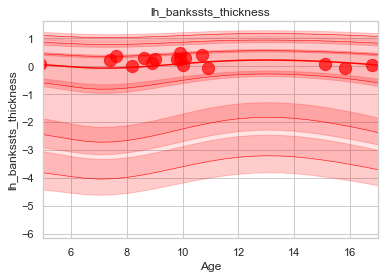

Running IDP 1 lh_caudalanteriorcingulate_thickness :
Making predictions with dummy covariates (for visualisation)
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
metrics: {'RMSE': array([0.17742067]), 'Rho': array([0.57389066]), 'pRho': array([0.00013931]), 'SMSE': array([0.68944566]), 'EXPV': array([0.31515301])}


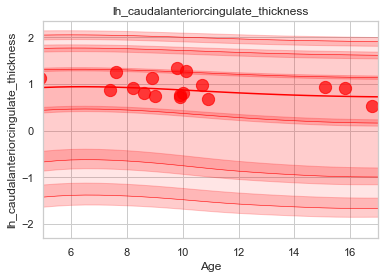

Running IDP 2 lh_caudalmiddlefrontal_thickness :
Making predictions with dummy covariates (for visualisation)
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
metrics: {'RMSE': array([0.1343071]), 'Rho': array([0.86649199]), 'pRho': array([1.47113821e-14]), 'SMSE': array([0.27789004]), 'EXPV': array([0.74288501])}


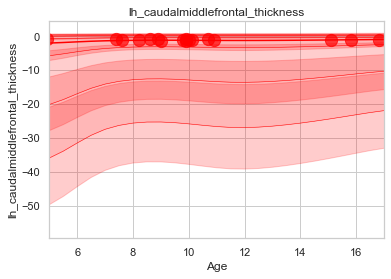

Running IDP 3 lh_cuneus_thickness :
Making predictions with dummy covariates (for visualisation)
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
metrics: {'RMSE': array([0.15174901]), 'Rho': array([0.79524829]), 'pRho': array([2.45492913e-10]), 'SMSE': array([0.38711479]), 'EXPV': array([0.6148275])}


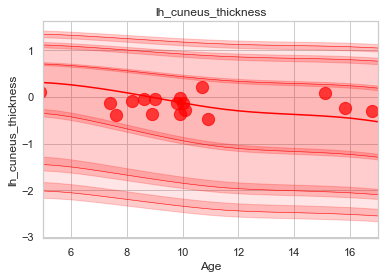

Running IDP 4 lh_entorhinal_thickness :
Making predictions with dummy covariates (for visualisation)
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
metrics: {'RMSE': array([0.30094235]), 'Rho': array([0.18220183]), 'pRho': array([0.28264055]), 'SMSE': array([1.08618674]), 'EXPV': array([-0.02360257])}


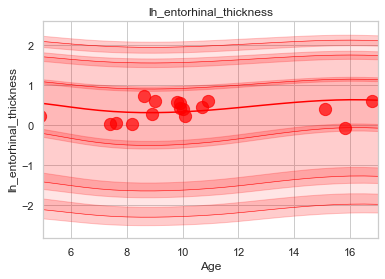

Running IDP 5 lh_fusiform_thickness :
Making predictions with dummy covariates (for visualisation)
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
metrics: {'RMSE': array([0.11971979]), 'Rho': array([0.90030414]), 'pRho': array([8.41479926e-18]), 'SMSE': array([0.37016607]), 'EXPV': array([0.63623472])}


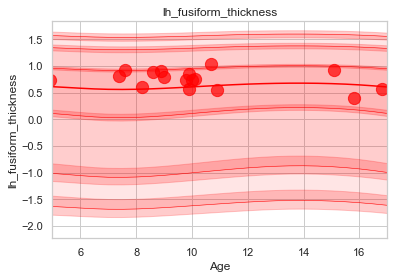

Running IDP 6 lh_inferiorparietal_thickness :
Making predictions with dummy covariates (for visualisation)
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
metrics: {'RMSE': array([0.10957408]), 'Rho': array([0.87769294]), 'pRho': array([1.68004936e-15]), 'SMSE': array([0.25586185]), 'EXPV': array([0.74626707])}


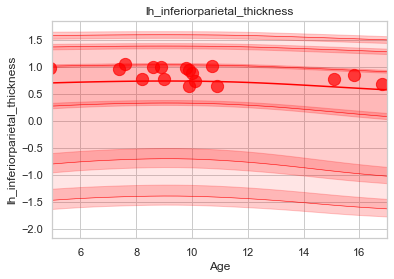

Running IDP 7 lh_inferiortemporal_thickness :
Making predictions with dummy covariates (for visualisation)
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
metrics: {'RMSE': array([0.14889122]), 'Rho': array([0.76569637]), 'pRho': array([3.90103331e-09]), 'SMSE': array([0.49698779]), 'EXPV': array([0.52172598])}


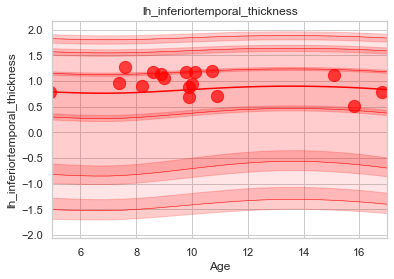

Running IDP 8 lh_isthmuscingulate_thickness :
Making predictions with dummy covariates (for visualisation)
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
metrics: {'RMSE': array([0.20944998]), 'Rho': array([0.56805147]), 'pRho': array([0.00017068]), 'SMSE': array([0.69293196]), 'EXPV': array([0.30779337])}


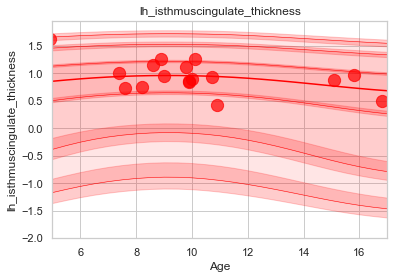

Running IDP 9 lh_lateraloccipital_thickness :
Making predictions with dummy covariates (for visualisation)
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
metrics: {'RMSE': array([0.12711019]), 'Rho': array([0.8117037]), 'pRho': array([4.09343589e-11]), 'SMSE': array([0.39394173]), 'EXPV': array([0.60606135])}


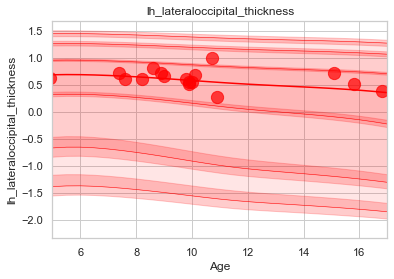

Running IDP 10 lh_lateralorbitofrontal_thickness :
Making predictions with dummy covariates (for visualisation)
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
metrics: {'RMSE': array([0.11316686]), 'Rho': array([0.77479433]), 'pRho': array([1.75732567e-09]), 'SMSE': array([0.40350609]), 'EXPV': array([0.60030402])}


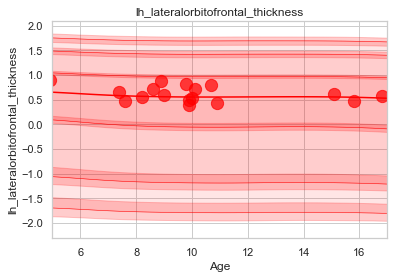

Running IDP 11 lh_lingual_thickness :
Making predictions with dummy covariates (for visualisation)
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
metrics: {'RMSE': array([0.15644748]), 'Rho': array([0.87140384]), 'pRho': array([5.85811156e-15]), 'SMSE': array([0.37499398]), 'EXPV': array([0.62679697])}


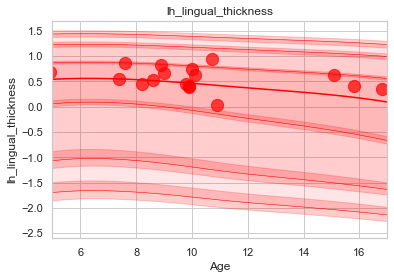

Running IDP 12 lh_medialorbitofrontal_thickness :
Making predictions with dummy covariates (for visualisation)
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
metrics: {'RMSE': array([0.15398931]), 'Rho': array([0.78558068]), 'pRho': array([6.42878375e-10]), 'SMSE': array([0.42299833]), 'EXPV': array([0.57759764])}


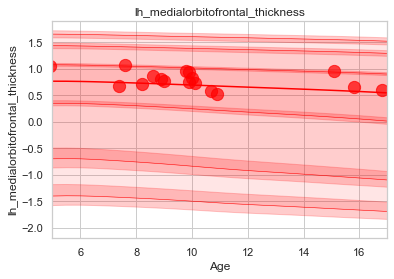

Running IDP 13 lh_middletemporal_thickness :
Making predictions with dummy covariates (for visualisation)
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
metrics: {'RMSE': array([0.16274474]), 'Rho': array([0.80827326]), 'pRho': array([6.05017438e-11]), 'SMSE': array([0.44930375]), 'EXPV': array([0.56777958])}


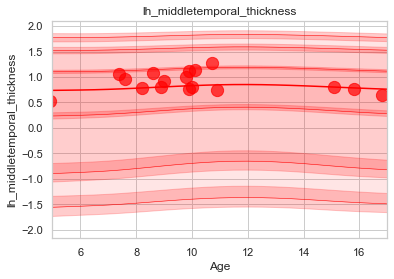

Running IDP 14 lh_parahippocampal_thickness :
Making predictions with dummy covariates (for visualisation)
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
metrics: {'RMSE': array([0.30444341]), 'Rho': array([0.10071806]), 'pRho': array([0.55567334]), 'SMSE': array([1.18516216]), 'EXPV': array([-0.08791199])}


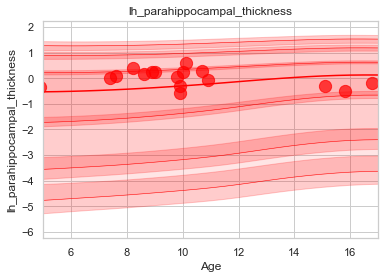

Running IDP 15 lh_paracentral_thickness :
Making predictions with dummy covariates (for visualisation)
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
metrics: {'RMSE': array([0.14655179]), 'Rho': array([0.88168678]), 'pRho': array([7.26852726e-16]), 'SMSE': array([0.25236083]), 'EXPV': array([0.74792519])}


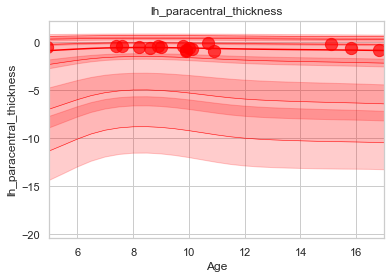

Running IDP 16 lh_parsopercularis_thickness :
Making predictions with dummy covariates (for visualisation)
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
metrics: {'RMSE': array([0.15557177]), 'Rho': array([0.8785141]), 'pRho': array([1.41837638e-15]), 'SMSE': array([0.51354071]), 'EXPV': array([0.61242573])}


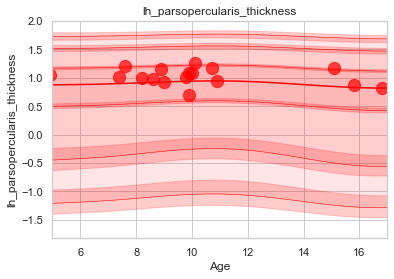

Running IDP 17 lh_parsorbitalis_thickness :
Making predictions with dummy covariates (for visualisation)
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
metrics: {'RMSE': array([0.21791025]), 'Rho': array([0.69830984]), 'pRho': array([4.70646852e-07]), 'SMSE': array([0.58796692]), 'EXPV': array([0.43166634])}


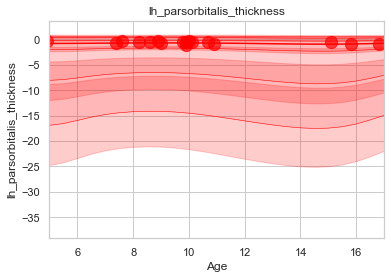

Running IDP 18 lh_parstriangularis_thickness :
Making predictions with dummy covariates (for visualisation)
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
metrics: {'RMSE': array([0.11687417]), 'Rho': array([0.86348528]), 'pRho': array([2.52915179e-14]), 'SMSE': array([0.2849416]), 'EXPV': array([0.74383132])}


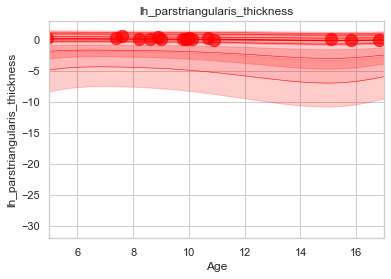

Running IDP 19 lh_pericalcarine_thickness :
Making predictions with dummy covariates (for visualisation)
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
metrics: {'RMSE': array([0.17287576]), 'Rho': array([0.65927046]), 'pRho': array([3.92475847e-06]), 'SMSE': array([0.59407868]), 'EXPV': array([0.40764526])}


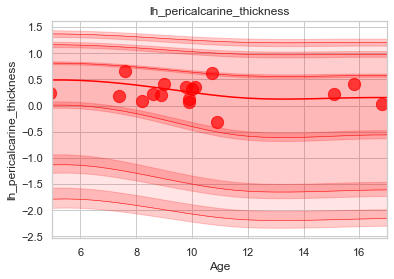

Running IDP 20 lh_postcentral_thickness :
Making predictions with dummy covariates (for visualisation)
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
metrics: {'RMSE': array([0.13382292]), 'Rho': array([0.81281091]), 'pRho': array([3.60097032e-11]), 'SMSE': array([0.44887559]), 'EXPV': array([0.58807515])}


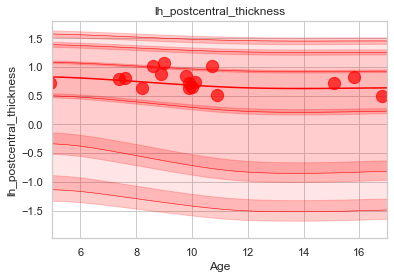

Running IDP 21 lh_posteriorcingulate_thickness :
Making predictions with dummy covariates (for visualisation)
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
metrics: {'RMSE': array([0.13789776]), 'Rho': array([0.60398133]), 'pRho': array([4.54017996e-05]), 'SMSE': array([0.65366402]), 'EXPV': array([0.3497158])}


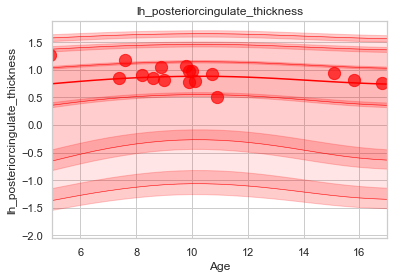

Running IDP 22 lh_precentral_thickness :
Making predictions with dummy covariates (for visualisation)
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
metrics: {'RMSE': array([0.18589386]), 'Rho': array([0.79589774]), 'pRho': array([2.29603859e-10]), 'SMSE': array([0.53662736]), 'EXPV': array([0.47297465])}


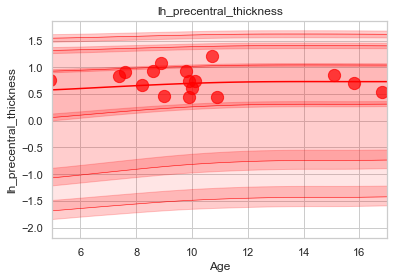

Running IDP 23 lh_precuneus_thickness :
Making predictions with dummy covariates (for visualisation)
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
metrics: {'RMSE': array([0.11703952]), 'Rho': array([0.92415796]), 'pRho': array([4.20152191e-21]), 'SMSE': array([0.28055627]), 'EXPV': array([0.72628895])}


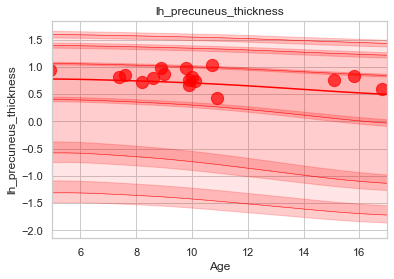

Running IDP 24 lh_rostralanteriorcingulate_thickness :
Making predictions with dummy covariates (for visualisation)
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
metrics: {'RMSE': array([0.20063376]), 'Rho': array([0.57584948]), 'pRho': array([0.00013]), 'SMSE': array([0.71427834]), 'EXPV': array([0.32768147])}


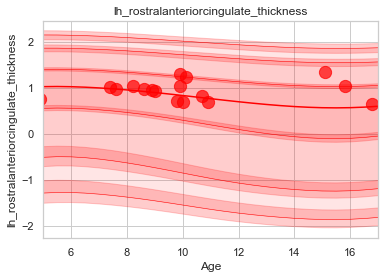

Running IDP 25 lh_rostralmiddlefrontal_thickness :
Making predictions with dummy covariates (for visualisation)
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
metrics: {'RMSE': array([0.13992395]), 'Rho': array([0.86689422]), 'pRho': array([1.36660075e-14]), 'SMSE': array([0.41028534]), 'EXPV': array([0.68151435])}


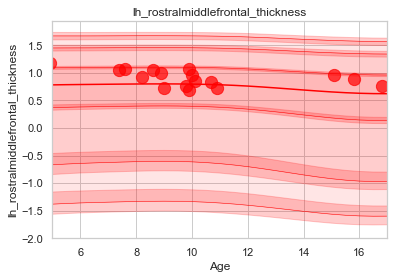

Running IDP 26 lh_superiorfrontal_thickness :
Making predictions with dummy covariates (for visualisation)
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
metrics: {'RMSE': array([0.0963118]), 'Rho': array([0.93520438]), 'pRho': array([4.03626809e-23]), 'SMSE': array([0.16317481]), 'EXPV': array([0.87203234])}


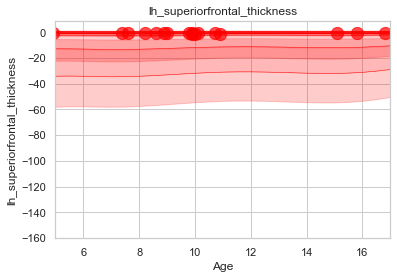

Running IDP 27 lh_superiorparietal_thickness :
Making predictions with dummy covariates (for visualisation)
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
metrics: {'RMSE': array([0.1198499]), 'Rho': array([0.88448939]), 'pRho': array([3.94774943e-16]), 'SMSE': array([0.29279945]), 'EXPV': array([0.72125842])}


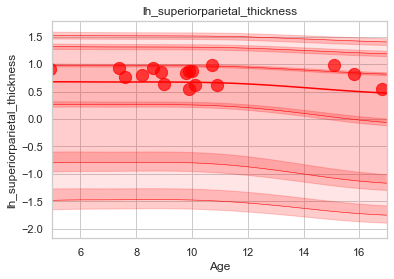

Running IDP 28 lh_superiortemporal_thickness :
Making predictions with dummy covariates (for visualisation)
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
metrics: {'RMSE': array([0.15781586]), 'Rho': array([0.76212005]), 'pRho': array([5.27486762e-09]), 'SMSE': array([0.53970387]), 'EXPV': array([0.50638972])}


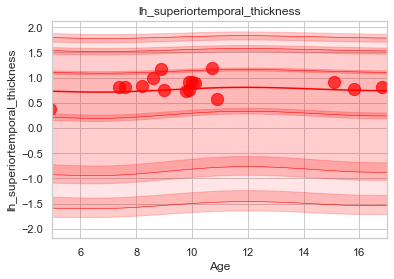

Running IDP 29 lh_supramarginal_thickness :
Making predictions with dummy covariates (for visualisation)
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
metrics: {'RMSE': array([0.14766269]), 'Rho': array([0.76010146]), 'pRho': array([6.23673232e-09]), 'SMSE': array([0.47687206]), 'EXPV': array([0.55770121])}


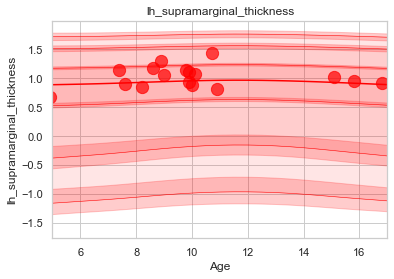

Running IDP 30 lh_frontalpole_thickness :
Making predictions with dummy covariates (for visualisation)
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
metrics: {'RMSE': array([0.27839257]), 'Rho': array([0.70017605]), 'pRho': array([4.21016931e-07]), 'SMSE': array([0.57584389]), 'EXPV': array([0.43187151])}


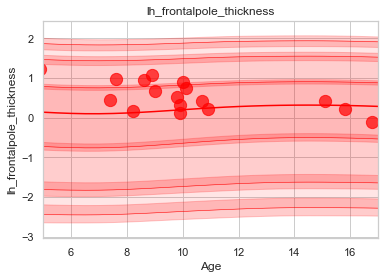

Running IDP 31 lh_temporalpole_thickness :
Making predictions with dummy covariates (for visualisation)
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
metrics: {'RMSE': array([0.39159313]), 'Rho': array([0.22523928]), 'pRho': array([0.18146069]), 'SMSE': array([1.20545965]), 'EXPV': array([-0.0523121])}


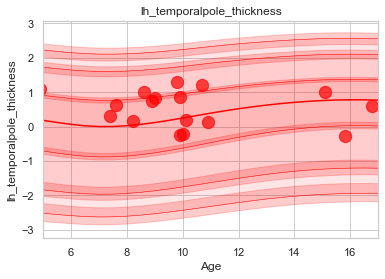

Running IDP 32 lh_transversetemporal_thickness :
Making predictions with dummy covariates (for visualisation)
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
metrics: {'RMSE': array([0.23849777]), 'Rho': array([0.7284246]), 'pRho': array([6.82391694e-08]), 'SMSE': array([0.58800383]), 'EXPV': array([0.41272254])}


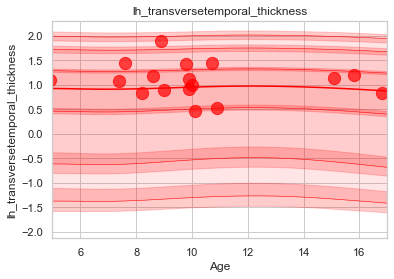

Running IDP 33 lh_insula_thickness :
Making predictions with dummy covariates (for visualisation)
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
metrics: {'RMSE': array([0.12577276]), 'Rho': array([0.79638177]), 'pRho': array([2.18392962e-10]), 'SMSE': array([0.39237656]), 'EXPV': array([0.61358978])}


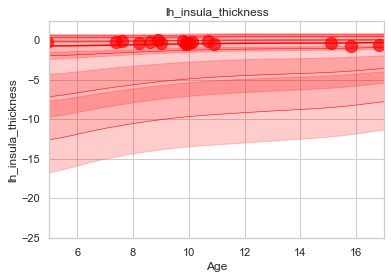

Running IDP 34 rh_bankssts_thickness :
Making predictions with dummy covariates (for visualisation)
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
metrics: {'RMSE': array([0.19208921]), 'Rho': array([0.74151113]), 'pRho': array([2.67121371e-08]), 'SMSE': array([0.51534177]), 'EXPV': array([0.51590193])}


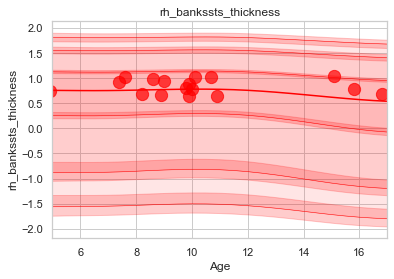

Running IDP 35 rh_caudalanteriorcingulate_thickness :
Making predictions with dummy covariates (for visualisation)
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
metrics: {'RMSE': array([0.24948459]), 'Rho': array([0.41334364]), 'pRho': array([0.01036218]), 'SMSE': array([0.87018095]), 'EXPV': array([0.15744615])}


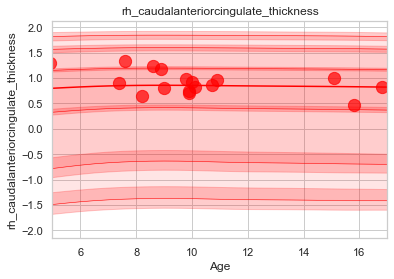

Running IDP 36 rh_caudalmiddlefrontal_thickness :
Making predictions with dummy covariates (for visualisation)
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
metrics: {'RMSE': array([0.1853476]), 'Rho': array([0.7645897]), 'pRho': array([4.28572623e-09]), 'SMSE': array([0.58313926]), 'EXPV': array([0.5265365])}


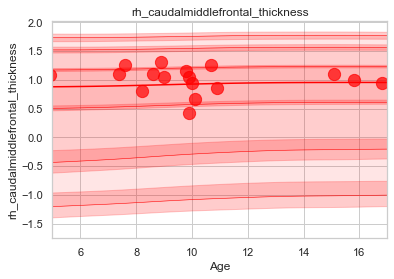

Running IDP 37 rh_cuneus_thickness :
Making predictions with dummy covariates (for visualisation)
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
metrics: {'RMSE': array([0.1444104]), 'Rho': array([0.80584879]), 'pRho': array([7.92881404e-11]), 'SMSE': array([0.38819018]), 'EXPV': array([0.61257777])}


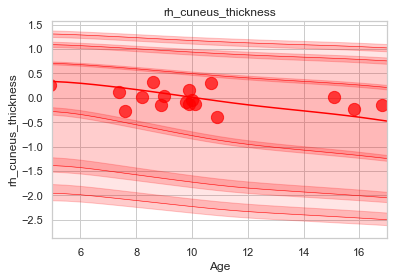

Running IDP 38 rh_entorhinal_thickness :
Making predictions with dummy covariates (for visualisation)
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
metrics: {'RMSE': array([0.36801561]), 'Rho': array([0.56509597]), 'pRho': array([0.00018884]), 'SMSE': array([0.9092061]), 'EXPV': array([0.25283303])}


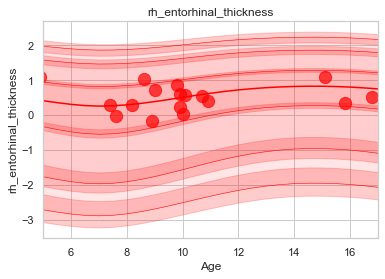

Running IDP 39 rh_fusiform_thickness :
Making predictions with dummy covariates (for visualisation)
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
metrics: {'RMSE': array([0.14125536]), 'Rho': array([0.86719716]), 'pRho': array([1.29254831e-14]), 'SMSE': array([0.40801151]), 'EXPV': array([0.59228687])}


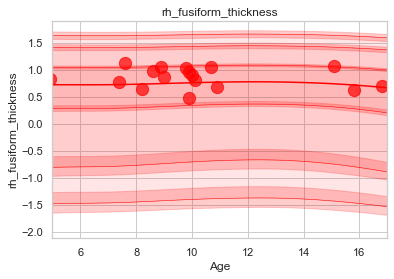

Running IDP 40 rh_inferiorparietal_thickness :
Making predictions with dummy covariates (for visualisation)
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
metrics: {'RMSE': array([0.13963649]), 'Rho': array([0.85837207]), 'pRho': array([6.1348062e-14]), 'SMSE': array([0.33018661]), 'EXPV': array([0.67108385])}


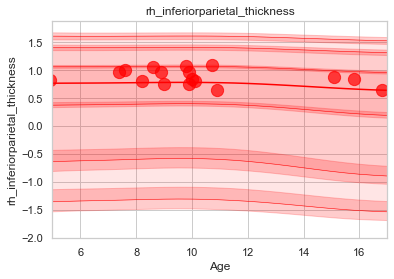

Running IDP 41 rh_inferiortemporal_thickness :
Making predictions with dummy covariates (for visualisation)
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
metrics: {'RMSE': array([0.14390093]), 'Rho': array([0.73970031]), 'pRho': array([3.05354234e-08]), 'SMSE': array([0.50090981]), 'EXPV': array([0.50040168])}


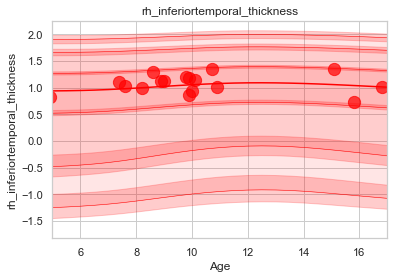

Running IDP 42 rh_isthmuscingulate_thickness :
Making predictions with dummy covariates (for visualisation)
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
metrics: {'RMSE': array([0.20274334]), 'Rho': array([0.50512541]), 'pRho': array([0.00118294]), 'SMSE': array([0.82040463]), 'EXPV': array([0.23385361])}


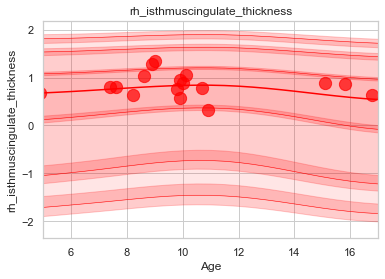

Running IDP 43 rh_lateraloccipital_thickness :
Making predictions with dummy covariates (for visualisation)
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
metrics: {'RMSE': array([0.13823586]), 'Rho': array([0.91696358]), 'pRho': array([5.5725791e-20]), 'SMSE': array([0.36285399]), 'EXPV': array([0.63715151])}


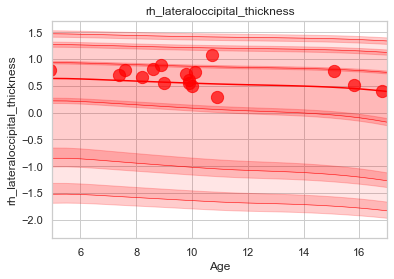

Running IDP 44 rh_lateralorbitofrontal_thickness :
Making predictions with dummy covariates (for visualisation)
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
metrics: {'RMSE': array([0.15720318]), 'Rho': array([0.72707042]), 'pRho': array([7.49173816e-08]), 'SMSE': array([0.56650377]), 'EXPV': array([0.4370967])}


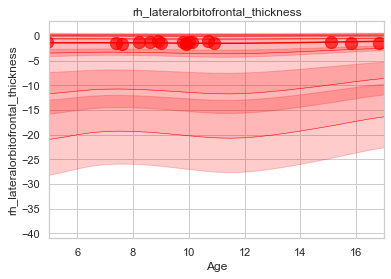

Running IDP 45 rh_lingual_thickness :
Making predictions with dummy covariates (for visualisation)
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
metrics: {'RMSE': array([0.12000275]), 'Rho': array([0.89675844]), 'pRho': array([2.130357e-17]), 'SMSE': array([0.25623466]), 'EXPV': array([0.74377847])}


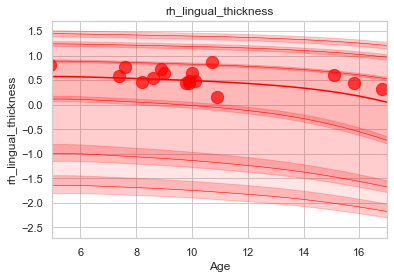

Running IDP 46 rh_medialorbitofrontal_thickness :
Making predictions with dummy covariates (for visualisation)
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
metrics: {'RMSE': array([0.11891188]), 'Rho': array([0.78063169]), 'pRho': array([1.02850179e-09]), 'SMSE': array([0.39559197]), 'EXPV': array([0.60913549])}


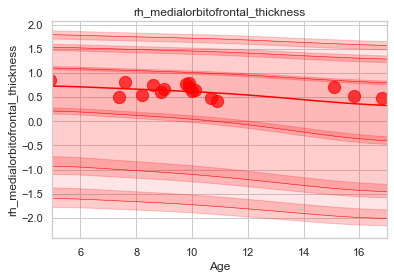

Running IDP 47 rh_middletemporal_thickness :
Making predictions with dummy covariates (for visualisation)
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
metrics: {'RMSE': array([0.13013481]), 'Rho': array([0.88217242]), 'pRho': array([6.54791425e-16]), 'SMSE': array([0.31648617]), 'EXPV': array([0.69508525])}


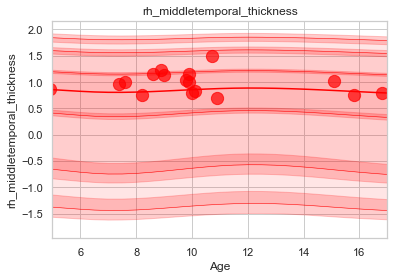

Running IDP 48 rh_parahippocampal_thickness :
Making predictions with dummy covariates (for visualisation)
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
metrics: {'RMSE': array([0.22500477]), 'Rho': array([0.07626812]), 'pRho': array([0.65589992]), 'SMSE': array([1.09619778]), 'EXPV': array([-0.08560435])}


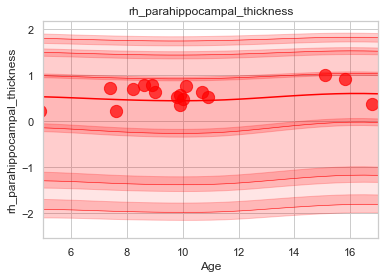

Running IDP 49 rh_paracentral_thickness :
Making predictions with dummy covariates (for visualisation)
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
metrics: {'RMSE': array([0.15505928]), 'Rho': array([0.83824852]), 'pRho': array([1.37958097e-12]), 'SMSE': array([0.33963808]), 'EXPV': array([0.67140226])}


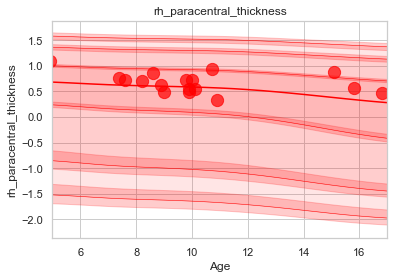

Running IDP 50 rh_parsopercularis_thickness :
Making predictions with dummy covariates (for visualisation)
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
metrics: {'RMSE': array([0.10838969]), 'Rho': array([0.87408164]), 'pRho': array([3.47663856e-15]), 'SMSE': array([0.24578603]), 'EXPV': array([0.75445577])}


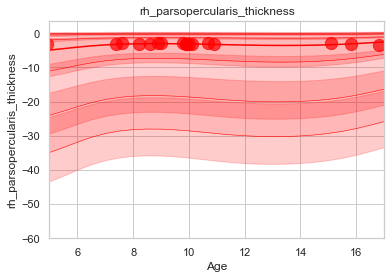

Running IDP 51 rh_parsorbitalis_thickness :
Making predictions with dummy covariates (for visualisation)
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
metrics: {'RMSE': array([0.20512872]), 'Rho': array([0.71473516]), 'pRho': array([1.70258267e-07]), 'SMSE': array([0.52622636]), 'EXPV': array([0.5043574])}


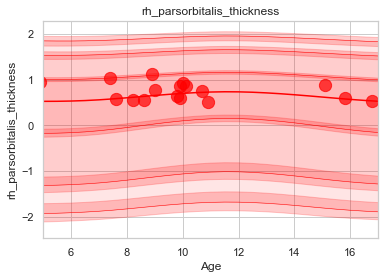

Running IDP 52 rh_parstriangularis_thickness :
Making predictions with dummy covariates (for visualisation)
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
metrics: {'RMSE': array([0.15403927]), 'Rho': array([0.85660114]), 'pRho': array([8.25670245e-14]), 'SMSE': array([0.44656266]), 'EXPV': array([0.63582522])}


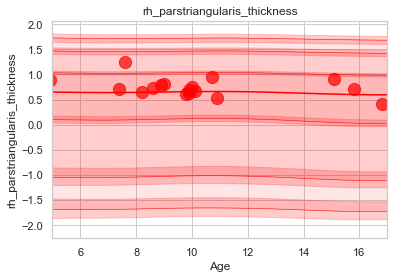

Running IDP 53 rh_pericalcarine_thickness :
Making predictions with dummy covariates (for visualisation)
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
metrics: {'RMSE': array([0.185527]), 'Rho': array([0.56888664]), 'pRho': array([0.00016584]), 'SMSE': array([0.70216796]), 'EXPV': array([0.30152306])}


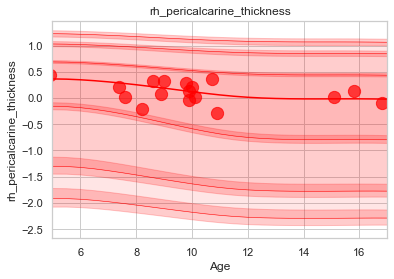

Running IDP 54 rh_postcentral_thickness :
Making predictions with dummy covariates (for visualisation)
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
metrics: {'RMSE': array([0.15644798]), 'Rho': array([0.77465418]), 'pRho': array([1.77965011e-09]), 'SMSE': array([0.55651669]), 'EXPV': array([0.48418077])}


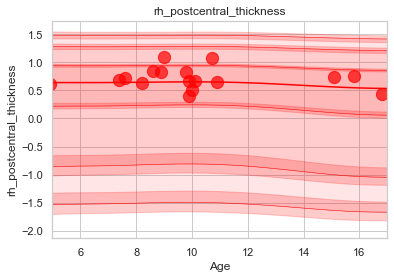

Running IDP 55 rh_posteriorcingulate_thickness :
Making predictions with dummy covariates (for visualisation)
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
metrics: {'RMSE': array([0.14461096]), 'Rho': array([0.46231148]), 'pRho': array([0.0035351]), 'SMSE': array([0.83095187]), 'EXPV': array([0.18524264])}


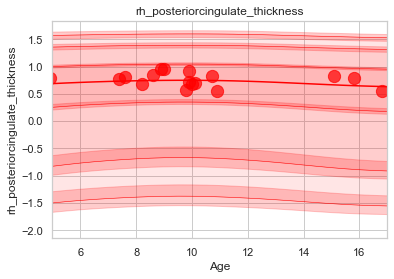

Running IDP 56 rh_precentral_thickness :
Making predictions with dummy covariates (for visualisation)
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
metrics: {'RMSE': array([0.19764166]), 'Rho': array([0.7457808]), 'pRho': array([1.93826091e-08]), 'SMSE': array([0.59693002]), 'EXPV': array([0.43647304])}


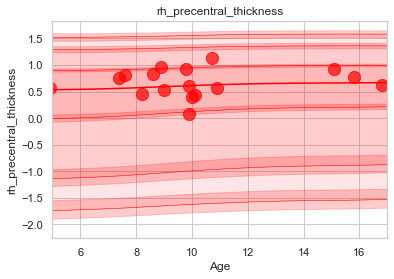

Running IDP 57 rh_precuneus_thickness :
Making predictions with dummy covariates (for visualisation)
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
metrics: {'RMSE': array([0.09418986]), 'Rho': array([0.90909513]), 'pRho': array([6.90753592e-19]), 'SMSE': array([0.24402101]), 'EXPV': array([0.80891355])}


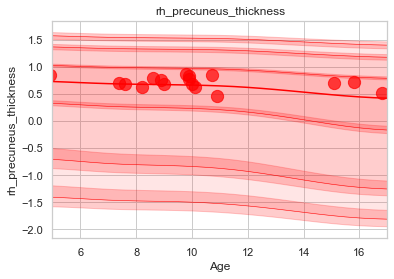

Running IDP 58 rh_rostralanteriorcingulate_thickness :
Making predictions with dummy covariates (for visualisation)
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
metrics: {'RMSE': array([0.24918968]), 'Rho': array([0.43538896]), 'pRho': array([0.00652234]), 'SMSE': array([0.82760958]), 'EXPV': array([0.18173269])}


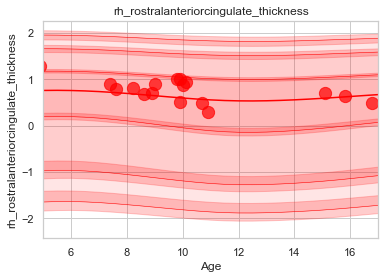

Running IDP 59 rh_rostralmiddlefrontal_thickness :
Making predictions with dummy covariates (for visualisation)
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
metrics: {'RMSE': array([0.11987802]), 'Rho': array([0.89109487]), 'pRho': array([8.64666259e-17]), 'SMSE': array([0.33885695]), 'EXPV': array([0.72312521])}


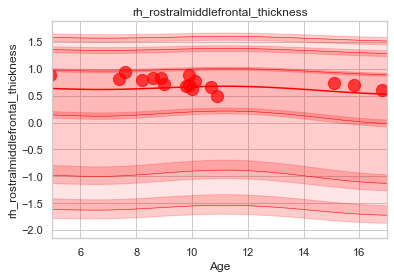

Running IDP 60 rh_superiorfrontal_thickness :
Making predictions with dummy covariates (for visualisation)
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
metrics: {'RMSE': array([0.10146684]), 'Rho': array([0.94009199]), 'pRho': array([3.70521532e-24]), 'SMSE': array([0.21347576]), 'EXPV': array([0.8824682])}


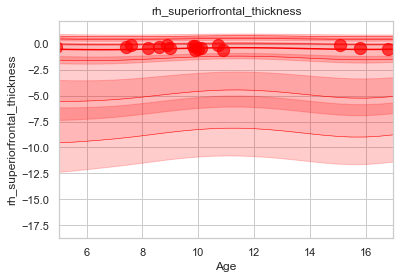

Running IDP 61 rh_superiorparietal_thickness :
Making predictions with dummy covariates (for visualisation)
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
metrics: {'RMSE': array([0.13399884]), 'Rho': array([0.87801486]), 'pRho': array([1.57243788e-15]), 'SMSE': array([0.31840582]), 'EXPV': array([0.68396447])}


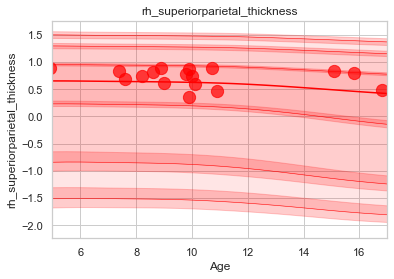

Running IDP 62 rh_superiortemporal_thickness :
Making predictions with dummy covariates (for visualisation)
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
metrics: {'RMSE': array([0.12985037]), 'Rho': array([0.81053266]), 'pRho': array([4.6825453e-11]), 'SMSE': array([0.44851098]), 'EXPV': array([0.59669861])}


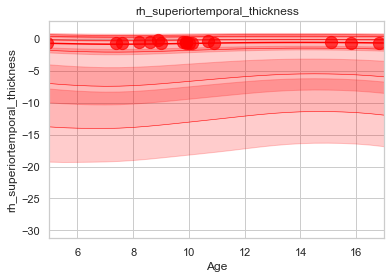

Running IDP 63 rh_supramarginal_thickness :
Making predictions with dummy covariates (for visualisation)
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
metrics: {'RMSE': array([0.12279564]), 'Rho': array([0.85412659]), 'pRho': array([1.24040542e-13]), 'SMSE': array([0.35002909]), 'EXPV': array([0.65049598])}


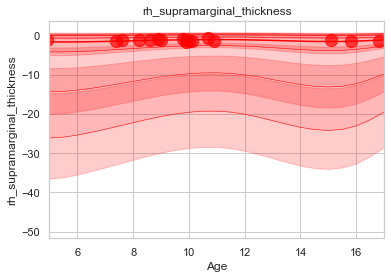

Running IDP 64 rh_frontalpole_thickness :
Making predictions with dummy covariates (for visualisation)
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
metrics: {'RMSE': array([0.31348834]), 'Rho': array([0.5253518]), 'pRho': array([0.00066517]), 'SMSE': array([0.7405676]), 'EXPV': array([0.2756773])}


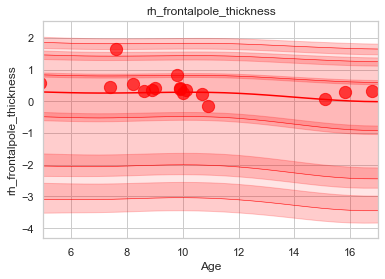

Running IDP 65 rh_temporalpole_thickness :
Making predictions with dummy covariates (for visualisation)
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
metrics: {'RMSE': array([0.44154246]), 'Rho': array([0.48737905]), 'pRho': array([0.00189852]), 'SMSE': array([0.89788266]), 'EXPV': array([0.22715128])}


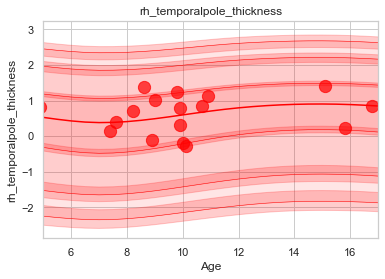

Running IDP 66 rh_transversetemporal_thickness :
Making predictions with dummy covariates (for visualisation)
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
metrics: {'RMSE': array([0.19509207]), 'Rho': array([0.76312376]), 'pRho': array([4.84972013e-09]), 'SMSE': array([0.45252802]), 'EXPV': array([0.54768422])}


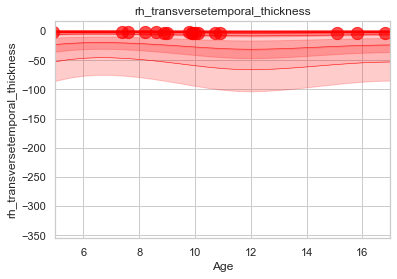

Running IDP 67 rh_insula_thickness :
Making predictions with dummy covariates (for visualisation)
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
metrics: {'RMSE': array([0.12448164]), 'Rho': array([0.84342891]), 'pRho': array([6.51758701e-13]), 'SMSE': array([0.37917994]), 'EXPV': array([0.7097116])}


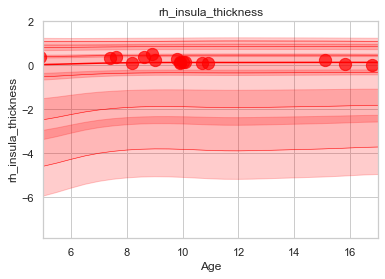

In [1262]:
if (sex == 1): 
    clr = 'brown';
else:
    clr = 'red'

# create dummy data for visualisation
print('configuring dummy data ...')
xx = np.arange(xmin, xmax, 0.5)
X0_dummy = np.zeros((len(xx), len(cols_cov)))
X0_dummy[:,0] = xx
X0_dummy[:,1] = sex

# create the design matrix
X_dummy = create_design_matrix(X0_dummy, xmin=xmin, xmax=xmax, 
                               site_ids=None, 
                               all_sites=site_ids_tr
                              )

# save the dummy covariates
cov_file_dummy = os.path.join(out_dir,'cov_bspline_dummy_mean.txt')
np.savetxt(cov_file_dummy, X_dummy)
sns.set(style='whitegrid')

for idp_num, idp in enumerate(idp_ids): 
    print('Running IDP', idp_num, idp, ':')
    idp_dir = os.path.join(out_dir, idp)
    os.chdir(idp_dir)

    # load the true data points
    yhat_te = load_2d(os.path.join(idp_dir, 'yhat_predict.txt'))
    s2_te = load_2d(os.path.join(idp_dir, 'ys2_predict.txt'))
    y_te = load_2d(os.path.join(idp_dir, 'resp_te.txt'))

    # set up the covariates for the dummy data
    print('Making predictions with dummy covariates (for visualisation)')
    yhat, s2 = predict(cov_file_dummy, 
                       alg = 'blr', 
                       respfile = None, 
                       model_path = os.path.join(idp_dir,'Models'), 
                       outputsuffix = '_dummy')

    # load the normative model
    with open(os.path.join(idp_dir,'Models', 'NM_0_0_estimate.pkl'), 'rb') as handle:
        nm = pickle.load(handle) 

    # get the warp and warp parameters
    W = nm.blr.warp
    warp_param = nm.blr.hyp[1:nm.blr.warp.get_n_params()+1] 

    # first, we warp predictions for the true data and compute evaluation metrics
    med_te = W.warp_predictions(np.squeeze(yhat_te), np.squeeze(s2_te), warp_param)[0]
    med_te = med_te[:, np.newaxis]
    print('metrics:', evaluate(y_te, med_te))

    # then, we warp dummy predictions to create the plots
    med, pr_int = W.warp_predictions(np.squeeze(yhat), np.squeeze(s2), warp_param)

    # extract the different variance components to visualise
    beta, junk1, junk2 = nm.blr._parse_hyps(nm.blr.hyp, X_dummy)
    s2n = 1/beta # variation (aleatoric uncertainty)
    s2s = s2-s2n # modelling uncertainty (epistemic uncertainty)

    # plot the data points
    y_te_rescaled_all = np.zeros_like(y_te)
    for sid, site in enumerate(site_ids_te):
        # plot the true test data points 
        if all(elem in site_ids_tr for elem in site_ids_te):
            # all data in the test set are present in the training set

            # first, we select the data points belonging to this particular site
            idx = np.where(np.bitwise_and(X_te[:,2] == sex, X_te[:,sid+len(cols_cov)+1] !=0))[0]
            if len(idx) == 0:
                print('No data for site', sid, site, 'skipping...')
                continue

            # then directly adjust the data
            idx_dummy = np.bitwise_and(X_dummy[:,1] > X_te[idx,1].min(), X_dummy[:,1] < X_te[idx,1].max())
            y_te_rescaled = y_te[idx] - np.median(y_te[idx]) + np.median(med[idx_dummy])
        else:
            # we need to adjust the data based on the adaptation dataset 

            # first, select the data point belonging to this particular site
            idx = np.where(np.bitwise_and(X_te[:,2] == sex, (df_te['site'] == site).to_numpy()))[0]

            # load the adaptation data
            y_ad = load_2d(os.path.join(idp_dir, 'resp_ad.txt'))
            X_ad = load_2d(os.path.join(idp_dir, 'cov_bspline_ad.txt'))
            idx_a = np.where(np.bitwise_and(X_ad[:,2] == sex, (df_ad['site'] == site).to_numpy()))[0]
            if len(idx) < 2 or len(idx_a) < 2:
                print('Insufficent data for site', sid, site, 'skipping...')
                continue

            # adjust and rescale the data
            y_te_rescaled, s2_rescaled = nm.blr.predict_and_adjust(nm.blr.hyp, 
                                                                   X_ad[idx_a,:], 
                                                                   np.squeeze(y_ad[idx_a]), 
                                                                   Xs=None, 
                                                                   ys=np.squeeze(y_te[idx]))
        # plot the (adjusted) data points
        
        plt.scatter(X_te[idx,1], y_te_rescaled, s=150, color=clr, alpha = 0.7)
        
    # plot the median of the dummy data
    plt.plot(xx, med, clr)

    # fill the gaps in between the centiles
    junk, pr_int25 = W.warp_predictions(np.squeeze(yhat), np.squeeze(s2), warp_param, percentiles=[0.25,0.75])
    junk, pr_int95 = W.warp_predictions(np.squeeze(yhat), np.squeeze(s2), warp_param, percentiles=[0.05,0.95])
    junk, pr_int99 = W.warp_predictions(np.squeeze(yhat), np.squeeze(s2), warp_param, percentiles=[0.01,0.99])
    plt.fill_between(xx, pr_int25[:,0], pr_int25[:,1], alpha = 0.1,color=clr)
    plt.fill_between(xx, pr_int95[:,0], pr_int95[:,1], alpha = 0.1,color=clr)
    plt.fill_between(xx, pr_int99[:,0], pr_int99[:,1], alpha = 0.1,color=clr)

    # make the width of each centile proportional to the epistemic uncertainty
    junk, pr_int25l = W.warp_predictions(np.squeeze(yhat), np.squeeze(s2-0.5*s2s), warp_param, percentiles=[0.25,0.75])
    junk, pr_int95l = W.warp_predictions(np.squeeze(yhat), np.squeeze(s2-0.5*s2s), warp_param, percentiles=[0.05,0.95])
    junk, pr_int99l = W.warp_predictions(np.squeeze(yhat), np.squeeze(s2-0.5*s2s), warp_param, percentiles=[0.01,0.99])
    junk, pr_int25u = W.warp_predictions(np.squeeze(yhat), np.squeeze(s2+0.5*s2s), warp_param, percentiles=[0.25,0.75])
    junk, pr_int95u = W.warp_predictions(np.squeeze(yhat), np.squeeze(s2+0.5*s2s), warp_param, percentiles=[0.05,0.95])
    junk, pr_int99u = W.warp_predictions(np.squeeze(yhat), np.squeeze(s2+0.5*s2s), warp_param, percentiles=[0.01,0.99])    
    plt.fill_between(xx, pr_int25l[:,0], pr_int25u[:,0], alpha = 0.2,color=clr)
    plt.fill_between(xx, pr_int95l[:,0], pr_int95u[:,0], alpha = 0.2,color=clr)
    plt.fill_between(xx, pr_int99l[:,0], pr_int99u[:,0], alpha = 0.2,color=clr)
    plt.fill_between(xx, pr_int25l[:,1], pr_int25u[:,1], alpha = 0.2,color=clr)
    plt.fill_between(xx, pr_int95l[:,1], pr_int95u[:,1], alpha = 0.2,color=clr)
    plt.fill_between(xx, pr_int99l[:,1], pr_int99u[:,1], alpha = 0.2,color=clr)

    # plot actual centile lines
    plt.plot(xx, pr_int25[:,0],color=clr, linewidth=0.5)
    plt.plot(xx, pr_int25[:,1],color=clr, linewidth=0.5)
    plt.plot(xx, pr_int95[:,0],color=clr, linewidth=0.5)
    plt.plot(xx, pr_int95[:,1],color=clr, linewidth=0.5)
    plt.plot(xx, pr_int99[:,0],color=clr, linewidth=0.5)
    plt.plot(xx, pr_int99[:,1],color=clr, linewidth=0.5)
    
#     plt.ylim(-1, 4)
    plt.xlabel('Age')
    plt.ylabel(idp) 
    plt.title(idp)
    plt.xlim((5,17))
    plt.savefig(os.path.join(idp_dir, 'centiles_' + str(sex)),  bbox_inches='tight')
    plt.show()

os.chdir(out_dir)

In [1115]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(blr_metrics.sort_values(by = 'EV', ascending = False))

                                      eid        NLL        EV       MSLL  \
26           lh_superiorfrontal_thickness -13.098165  0.719125  -1.555561   
44      rh_lateralorbitofrontal_thickness  -9.216480  0.706854  -2.236773   
57                 rh_precuneus_thickness -20.253930  0.703449  -6.486718   
27          lh_superiorparietal_thickness -19.297464  0.699923  -9.563528   
23                 lh_precuneus_thickness -20.510138  0.699187  -6.606118   
59      rh_rostralmiddlefrontal_thickness -12.125685  0.697391  -4.831340   
6           lh_inferiorparietal_thickness -18.834756  0.695212  -4.681864   
60           rh_superiorfrontal_thickness -25.958204  0.694591  -1.417526   
61          rh_superiorparietal_thickness -19.765601  0.690539  -9.865504   
63             rh_supramarginal_thickness -29.651171  0.678487  -4.402194   
40          rh_inferiorparietal_thickness -20.042290  0.656234  -4.818970   
29             lh_supramarginal_thickness -16.063892  0.648892  -3.326745   

# Extract Z-scores

In [141]:

def fetch_raw_Z():
    # Read outputs files 
    Z_pred = {}

    for idp_num, idp in enumerate(idp_ids): 
        idp_dir = os.path.join(out_dir, idp)
        os.chdir(idp_dir)
        f = open("Z_predict.txt", "r")
        Z_pred.update({f'{idp}_Z_predict' : f.readlines()})

    Z_df_pred = pd.DataFrame(Z_pred).astype(float)
    
    return Z_df_pred

In [142]:
Z_df = fetch_raw_Z()
Z_df = Z_df.join(df_te3.reset_index(drop = True))

In [143]:
Z_df.groupby('ASD').size()

ASD
No      37
Yes    151
dtype: int64

## Export Z-Scores

In [144]:
Z_df.to_csv(os.path.join(data_dir, 'Outputs/Z_aims.csv'), index = False)

# Brain maps

In [86]:
from enigmatoolbox.utils.parcellation import parcel_to_surface
from enigmatoolbox.plotting import plot_cortical

In [87]:
Z_df = Z_df[Z_df.sex == 2]

In [96]:
Z_df = Z_df[(Z_df['age_at_scan'] > 6 )& (Z_df['age_at_scan'] < 16)]

In [97]:
Z_df.groupby('ASD').size()

ASD
No     21
TCA    89
dtype: int64

In [98]:
cols_df = [col for col in Z_df.columns if 'Z_predict' in col]

## Mean CT

In [116]:
X = Z_df[Z_df.ASD == 'TCA'][cols_df].mean()
CT_d_fsa5 = parcel_to_surface(X, 'aparc_fsa5')
plot_cortical(array_name=CT_d_fsa5, surface_name="fsa5", size=(800, 400),
              cmap='RdBu_r', color_bar=True, color_range=(-1, 1))

## Difference in prevalence

In [1281]:
def compute_abs_prevalence(Z_df_est):
    prev_est= {}
    for i in Z_df_est.columns:
        prev_est.update({i : [Z_df_est.query(f'{i} > 2 or {i} < -2').count()[1]/Z_df_est.shape[0]]})
    prev_est = pd.DataFrame.from_dict(prev_est)
    
    return prev_est

In [1282]:
Z_df_est = Z_df.loc[Z_df.ASD == 'No'][cols_df]
Z_df_pred = Z_df.loc[Z_df.ASD == 'TCA'][cols_df]

In [1283]:
print('TD count : ', Z_df_est.shape[0])
print('Diag count : ', Z_df_pred.shape[0])

TD count :  15
Diag count :  78


In [1284]:
delta = ((abs(Z_df_pred[cols_df]) > 2 ).sum()/Z_df_pred.shape[0]) - ((abs(Z_df_est[cols_df]) > 2 ).sum()/Z_df_est.shape[0])

In [1285]:
delta

lh_bankssts_thickness_Z_predict                   0.064103
lh_caudalanteriorcingulate_thickness_Z_predict    0.000000
lh_caudalmiddlefrontal_thickness_Z_predict       -0.133333
lh_cuneus_thickness_Z_predict                    -0.041026
lh_entorhinal_thickness_Z_predict                 0.192308
                                                    ...   
rh_supramarginal_thickness_Z_predict              0.112821
rh_frontalpole_thickness_Z_predict               -0.053846
rh_temporalpole_thickness_Z_predict               0.025641
rh_transversetemporal_thickness_Z_predict        -0.017949
rh_insula_thickness_Z_predict                    -0.041026
Length: 68, dtype: float64

In [1286]:
# Compute prevalence of |Z| > 2
abs_TD = compute_abs_prevalence(Z_df_est)
abs_ASD = compute_abs_prevalence(Z_df_pred)
diff = abs_ASD.values - abs_TD.values

In [1287]:
diff.max()

0.2564102564102564

In [1289]:
X = delta
CT_d_fsa5 = parcel_to_surface(X, 'aparc_fsa5')
plot_cortical(array_name=CT_d_fsa5, surface_name="fsa5", size=(800, 400),
              cmap='RdBu_r', color_bar=True, color_range=(-0.25, 0.25))

In [1290]:
Z_df_est

,lh_bankssts_thickness_Z_predict,lh_caudalanteriorcingulate_thickness_Z_predict,lh_caudalmiddlefrontal_thickness_Z_predict,lh_cuneus_thickness_Z_predict,lh_entorhinal_thickness_Z_predict,lh_fusiform_thickness_Z_predict,lh_inferiorparietal_thickness_Z_predict,lh_inferiortemporal_thickness_Z_predict,lh_isthmuscingulate_thickness_Z_predict,lh_lateraloccipital_thickness_Z_predict,...,rh_rostralanteriorcingulate_thickness_Z_predict,rh_rostralmiddlefrontal_thickness_Z_predict,rh_superiorfrontal_thickness_Z_predict,rh_superiorparietal_thickness_Z_predict,rh_superiortemporal_thickness_Z_predict,rh_supramarginal_thickness_Z_predict,rh_frontalpole_thickness_Z_predict,rh_temporalpole_thickness_Z_predict,rh_transversetemporal_thickness_Z_predict,rh_insula_thickness_Z_predict
101,0.446492,-0.206221,0.775827,-0.577921,-0.696622,0.717152,0.359617,0.289108,0.325041,0.301557,...,0.598729,0.205084,-0.082958,0.562646,-0.341433,-0.886498,0.073654,-0.429424,-0.124452,0.337558
106,0.356137,-0.496820,-2.234983,0.820785,0.485533,0.851173,-0.470085,0.232694,-0.140494,0.401451,...,0.992882,-0.338046,-1.620532,-0.594712,-0.663105,-0.409846,0.125321,1.170817,-0.503899,-0.727970
107,1.879293,-0.401841,0.632980,0.373628,0.744646,0.930604,0.246907,-0.242067,-0.620480,-0.700847,...,-0.636897,0.588006,0.029402,0.919845,-0.021538,-0.564816,-0.105818,0.673130,-0.663276,-1.258446
108,0.357346,0.250705,0.452277,2.095651,-0.228899,1.798522,0.684165,0.376957,-0.605938,2.746612,...,-0.914078,-1.104331,-0.967667,0.711026,-0.105133,-0.111776,-0.750315,0.339635,-1.523313,-2.708159
109,-1.206143,0.609011,0.993356,-0.093383,-1.149116,-1.384375,0.329823,-1.638224,1.024132,-0.139183,...,0.093574,0.063348,-0.088445,1.087173,0.055644,0.915980,0.218240,-0.706884,0.265007,-1.002435
115,0.690371,1.560544,0.248991,-0.902368,-0.104643,0.382079,-1.018775,1.200764,1.966393,0.282861,...,1.096112,-0.052888,-1.101925,-0.806692,-0.657514,-1.891873,-0.184932,-1.498433,-2.607931,-0.846833
117,-0.496539,0.202654,-0.345938,-0.020465,-0.534742,-0.180593,-0.539558,0.196704,-0.926024,-0.169060,...,0.547186,0.271058,-0.418561,0.215251,1.072076,0.726430,0.579647,0.805429,1.590839,-0.756080
125,-0.076358,1.706801,-0.944141,0.251607,0.259789,0.186953,0.680448,0.553403,0.720373,-0.074673,...,1.320792,-0.784709,-1.027423,0.162785,-0.484967,-1.249686,1.160166,1.473351,0.168992,-0.952071
127,-0.720626,-0.200910,0.699818,-1.199982,1.241890,-0.153467,-0.816918,-0.481785,-2.264952,-1.679214,...,-0.842013,-0.938776,-1.279193,-0.949137,1.162950,-0.131122,-1.092180,1.651077,1.166008,0.059934
131,1.046409,1.285151,-2.193907,-1.373529,-1.113749,1.430518,1.141626,1.177049,-1.493200,-0.192497,...,0.262759,0.832998,-0.063148,-0.428412,-1.554350,-1.828657,3.684425,-0.135301,0.170877,-0.256677


## Top deciles

In [1298]:
top_4 = []
for i in cols_df:
    top_4.append(Z_df_pred[i].nsmallest(4).mean())

In [1301]:
CT_d_fsa5 = parcel_to_surface(np.array(top_4), 'aparc_fsa5')
plot_cortical(array_name=CT_d_fsa5, surface_name="fsa5", size=(800, 400),
              cmap='Blues_r', color_bar=True, color_range=(-3, 0))

## Explained variance map

In [1199]:
th40 = blr_metrics.copy()

In [1200]:
blr_metrics.describe()

,NLL,EV,MSLL,BIC,Skew,Kurtosis
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,-7.097821,0.471042,-5.613312,2.376898,0.052665,0.425208
std,17.651432,0.204868,5.426071,35.302863,0.483572,0.981940
min,-29.651171,-0.092155,-25.830183,-42.729804,-1.317426,-0.724435
25%,-17.564031,0.355003,-6.516568,-18.555523,-0.265112,-0.273634
50%,-12.346596,0.528440,-4.217519,-8.120654,0.052409,0.266149
75%,-4.504572,0.625537,-1.637698,7.563394,0.322280,0.755971
max,52.828375,0.719125,-0.455913,122.229289,1.421566,4.814456


In [1201]:
th40.loc[th40['EV'] < 0.4, 'EV'] =  0

In [1203]:
CT_d_fsa5 = parcel_to_surface(th40['EV'], 'aparc_fsa5')
plot_cortical(array_name=CT_d_fsa5, surface_name="fsa5", size=(800, 400),
              cmap='Reds', color_bar=True, color_range=(0.4, 0.72))